__Author: Shivam Dixit__

__Solution to the Case study-Classification of Patients with Abnormal Blood Pressure__

# Initial Data Exploration:

* It includes various analyses like __checking the shape of tabular data, presence of columns, counting values per class in the target column, statistical analysis of continuous features, and inspecting missing values in the dataset, etc.__

In [1]:
# Load required libraries !!!
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Load data !!
data = pd.read_csv("data.csv")

#### Shape of tabular data, presence of columns, count of values per class in the target column (for balanced/unbalanced data).

In [3]:
print(f"Shape of the dataset: {data.shape}\n")
print(f"Columns in dataset: {data.columns}\n")
print(f"Count of values per class in target column: {data['Blood_Pressure_Abnormality'].value_counts()}")

Shape of the dataset: (2000, 15)

Columns in dataset: Index(['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

Count of values per class in target column: Blood_Pressure_Abnormality
0    1013
1     987
Name: count, dtype: int64


#### Statistical analysis of continuous features

In [4]:
data[['Level_of_Hemoglobin','Genetic_Pedigree_Coefficient', 'Age', 'BMI','Physical_activity', 'salt_content_in_the_diet','alcohol_consumption_per_day']].describe(include='all')

,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day
count,2000.000000,1908.000000,2000.000000,2000.000000,2000.000000,2000.000000,1758.000000
mean,11.710035,0.494817,46.558500,30.081500,25254.424500,24926.097000,251.008532
std,2.186701,0.291736,17.107832,11.761208,14015.439623,14211.692586,143.651884
min,8.100000,0.000000,18.000000,10.000000,628.000000,22.000000,0.000000
25%,10.147500,0.240000,32.000000,20.000000,13605.750000,13151.750000,126.250000
50%,11.330000,0.490000,46.000000,30.000000,25353.000000,25046.500000,250.000000
75%,12.945000,0.740000,62.000000,40.000000,37382.250000,36839.750000,377.750000
max,17.560000,1.000000,75.000000,50.000000,49980.000000,49976.000000,499.000000


#### Inspecting missing values in the dataset as a percentage (%).

In [5]:
print(f"Count of missing values in dataset in percentage(%):\n\n", data.isnull().sum()/data.shape[0]*100)

Count of missing values in dataset in percentage(%):

 Patient_Number                    0.0
Blood_Pressure_Abnormality        0.0
Level_of_Hemoglobin               0.0
Genetic_Pedigree_Coefficient      4.6
Age                               0.0
BMI                               0.0
Sex                               0.0
Pregnancy                        77.9
Smoking                           0.0
Physical_activity                 0.0
salt_content_in_the_diet          0.0
alcohol_consumption_per_day      12.1
Level_of_Stress                   0.0
Chronic_kidney_disease            0.0
Adrenal_and_thyroid_disorders     0.0
dtype: float64


## Initial Observation(s):

* Dataset has total 2000 datapoints with 14 columns (including Target).
* Difference in the count of datapoint belonging to each class (Normal and abnormal Blood_Pressure) is very small (1013-987=26, minimal), Hence, we can consider it __BALANCED DATASET__.
* In Statistical analysis of continuous features we can check that count for 'Genetic_Pedigree_Coefficient' and 'alcohol_consumption_per_day' is less then 2000, Hence they have missing values. Also, we can check 'mean', 'median(50%)', 'min' and 'max' values for different continuous values to measure the range of values, spread etc.
* From missing value analysis we found that, feature __'Genetic_Pedigree_Coefficient' have 4.6%, 'Pregnancy' have 77.9% and 'alcohol_consumption_per_day' have 12.1% missing values.__

# Objective: 
* Employing statistical techniques, conduct a preliminary prognosis of Hypertension/hypotension, based on the level of
hemoglobin and genetic history of the individual.

In [6]:
## Selecting required columns from loaded data and storeing it to another dataframe !!
data_obj = data[['Blood_Pressure_Abnormality', 'Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient']]

## Removing datapoins with missing values in 'Genetic_Pedigree_Coefficient' for Statistical analysis !!
data_obj=data_obj.loc[data_obj['Genetic_Pedigree_Coefficient'].notnull()]

In [7]:
data_obj[['Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient']].describe()

,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient
count,1908.000000,1908.000000
mean,11.706887,0.494817
std,2.183418,0.291736
min,8.100000,0.000000
25%,10.140000,0.240000
50%,11.330000,0.490000
75%,12.925000,0.740000
max,17.560000,1.000000


## Observation(s):

* __Range of Values:__ Both 'Level_of_Hemoglobin' and 'Genetic_Pedigree_Coefficient' have a meaningful range of values. 'Level_of_Hemoglobin' ranges from 8.10 to 17.56 g/dl, while 'Genetic_Pedigree_Coefficient' ranges from 0.000 to 1.000. This indicates that there is variability in the data, which can be useful for modeling.
* __Central Tendency:__ The mean and median values are relatively close for both features. This suggests that the distribution of data might be approximately symmetric and not heavily skewed.
* __Standard Deviation:__ The standard deviation provides a measure of the spread of the data. For 'Level_of_Hemoglobin', the standard deviation is around 2.18, indicating moderate variability around the mean. For 'Genetic_Pedigree_Coefficient', the standard deviation is around 0.29, indicating moderate variability as well.
* __Percentiles:__ The quartiles (25th, 50th, and 75th percentiles) provide insights into the distribution of the data. For example, the fact that the median 'Level_of_Hemoglobin' is around 11.33 suggests that roughly half of the data points fall above this value and half fall below.

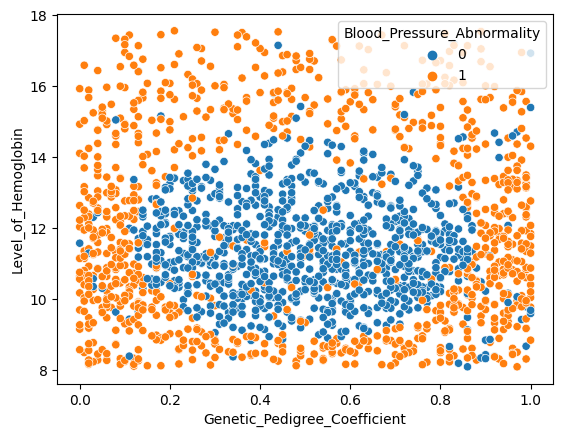

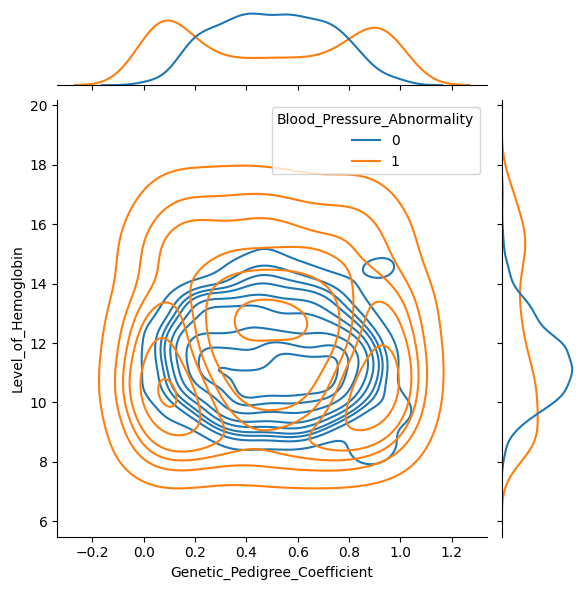

In [8]:
### Plot 2D_Scatter_plot for Multivariate analysis !!
sns.scatterplot(data_obj, x="Genetic_Pedigree_Coefficient", y="Level_of_Hemoglobin", hue="Blood_Pressure_Abnormality", sizes=6)

## Plot 2D_Density_plot/contour_plot for Multivariate analysis !!
sns.jointplot(x="Genetic_Pedigree_Coefficient", y="Level_of_Hemoglobin", hue='Blood_Pressure_Abnormality', data=data_obj, kind="kde");
plt.show();

## Observation(s):

#### Scatter_plot: 

* __Limited Discriminative Power:__ The overlapping pattern indicates that the selected features might not have strong discriminative power to separate the classes effectively. This could make it challenging for a linear classifier to accurately distinguish between the classes.
* __Complex Decision Boundaries:__ The blurred boundaries between the circles suggest that a linear decision boundary (e.g., a straight line) might not be sufficient to accurately classify data points. More complex decision boundaries, such as curved or nonlinear boundaries, might be needed to capture the underlying patterns.
* __Potential Need for Nonlinear Models:__ Linear classifiers like Logistic Regression might struggle to capture the complex relationships between the features and the target classes. Nonlinear models, such as Support Vector Machines with nonlinear kernels or decision trees, might perform better in capturing the intricate patterns.
* __Additional Feature Requirment:__ The scatter plot suggests that the current set of features ("Genetic_Pedigree_Coefficient" and "Level_of_Hemoglobin") might not fully capture the differences between the classes.
* __Ensemble Methods:__ Ensemble methods, such as Random Forest or Gradient Boosting, can often handle complex patterns and overlapping classes by combining multiple weaker models into a stronger one.
* __Evaluation Metrics:__ When dealing with overlapping classes, accuracy might not be the most appropriate evaluation metric, as it can be misleading. Other metrics like precision, recall, F1-score, or ROC-AUC might provide a more comprehensive assessment of model performance.

#### Joint_plot:

* __Feature Distributions:__ For normal blood pressure patients, both "Genetic_Pedigree_Coefficient" and "Level_of_Hemoglobin" follow a distribution that resembles a bell curve (normal distribution). This suggests that the majority of data points for these features are clustered around the mean, with relatively fewer data points in the tails.
* __Bimodal Distributions:__ The presence of bimodal distributions (Two bell-shaped curves adjacent to each other) within the "Genetic_Pedigree_Coefficient" and "Level_of_Hemoglobin" features for abnormal blood pressure patients suggests the existence of distinct subgroups within this category. This could indicate the presence of different underlying factors contributing to abnormal blood pressure.
* __Feature Importance:__ The observed patterns emphasize the potential importance of "Genetic_Pedigree_Coefficient" and "Level_of_Hemoglobin" in distinguishing between normal and abnormal blood pressure patients. These features seem to hold valuable information for class separation.
* __Clinical Insights:__ The presence of distinct subgroups within the abnormal blood pressure category could have clinical implications. It might suggest different subtypes of abnormal blood pressure cases, each with its own set of risk factors, causes, or treatment strategies.

In [9]:
## Selecting Datapoints for Normal_BP_Patients !!
normal_bp = data_obj.loc[data_obj["Blood_Pressure_Abnormality"] == 0];
## Selecting Datapoints for Abnormal_BP_Patients !!
abnormal_bp = data_obj.loc[data_obj["Blood_Pressure_Abnormality"] == 1];

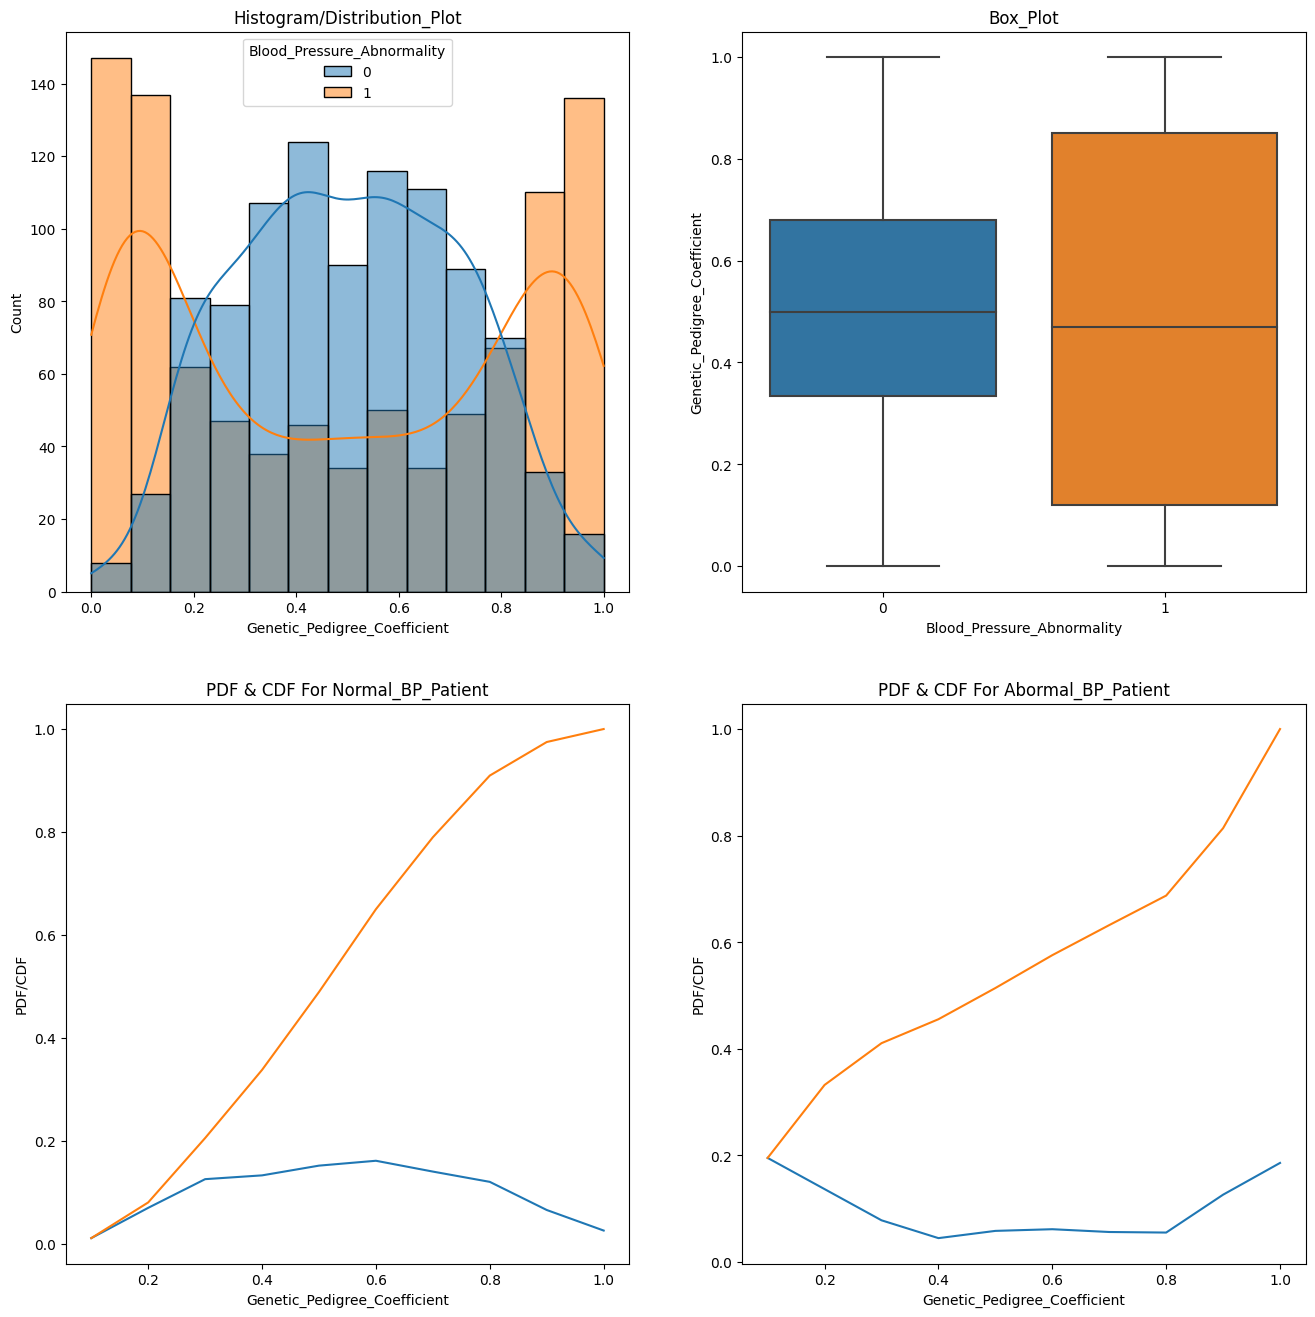

In [10]:
## Univariate analysis for "Genetic_Pedigree_Coefficient" !!

## Plot 'Histogram/Distribution_Plot' !!
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(16,16))
ax1.set_title('Histogram/Distribution_Plot')
sns.histplot(data_obj, x="Genetic_Pedigree_Coefficient", hue="Blood_Pressure_Abnormality", kde=True, ax=ax1);

## Ploting Box Plot !!
ax2.set_title('Box_Plot')
sns.boxplot(x='Blood_Pressure_Abnormality',y='Genetic_Pedigree_Coefficient', data=data_obj, ax=ax2)

## PDF & CDF For Normal_BP_Patient !!
counts, bin_edges = np.histogram(normal_bp['Genetic_Pedigree_Coefficient'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
ax3.set_title('PDF & CDF For Normal_BP_Patient')
ax3.set_xlabel('Genetic_Pedigree_Coefficient');ax3.set_ylabel('PDF/CDF')
ax3.plot(bin_edges[1:], pdf);ax3.plot(bin_edges[1:], cdf)

## PDF & CDF For Abnormal_BP_Patient !!
counts, bin_edges = np.histogram(abnormal_bp['Genetic_Pedigree_Coefficient'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
ax4.set_title('PDF & CDF For Abormal_BP_Patient')
ax4.set_xlabel('Genetic_Pedigree_Coefficient');ax4.set_ylabel('PDF/CDF')
ax4.plot(bin_edges[1:], pdf);ax4.plot(bin_edges[1:], cdf);

In [11]:
from statsmodels import robust
## Mean, Variance, Std-deviation,etc.!!
print('For Normal_BP_Patients:')
print(normal_bp['Genetic_Pedigree_Coefficient'].describe())
print("\n90th Percentiles:")
print(np.percentile(normal_bp['Genetic_Pedigree_Coefficient'],90))
print ("Median Absolute Deviation")
print(robust.mad(normal_bp['Genetic_Pedigree_Coefficient']))
print('--'*30)

print('\nFor Abnormal_BP_Patients:')
print(abnormal_bp['Genetic_Pedigree_Coefficient'].describe())
print("\n90th Percentiles:")
print(np.percentile(abnormal_bp['Genetic_Pedigree_Coefficient'],90))
print ("Median Absolute Deviation")
print(robust.mad(abnormal_bp['Genetic_Pedigree_Coefficient']))

For Normal_BP_Patients:
count    951.000000
mean       0.504606
std        0.213900
min        0.000000
25%        0.335000
50%        0.500000
75%        0.680000
max        1.000000
Name: Genetic_Pedigree_Coefficient, dtype: float64

90th Percentiles:
0.79
Median Absolute Deviation
0.2520423771459523
------------------------------------------------------------

For Abnormal_BP_Patients:
count    957.000000
mean       0.485089
std        0.352305
min        0.000000
25%        0.120000
50%        0.470000
75%        0.850000
max        1.000000
Name: Genetic_Pedigree_Coefficient, dtype: float64

90th Percentiles:
0.95
Median Absolute Deviation
0.5337367986620167


## Observation(s):

#### Histogram/Distribution_plot:

* __Feature Distributions:__ For normal blood pressure patients, "Genetic_Pedigree_Coefficient" follow a distribution that resembles a bell curve (normal distribution). This suggests that the majority of data points for these features are clustered around the mean, with relatively fewer data points in the tails.
* __Bimodal Distributions:__ The presence of bimodal distributions (Two bell-shaped curves adjacent to each other) within the "Genetic_Pedigree_Coefficient" for abnormal blood pressure patients suggests the existence of distinct subgroups within this category. This could indicate the presence of different underlying factors contributing to abnormal blood pressure.
* __Clinical Insights:__ The presence of distinct subgroups within the abnormal blood pressure category could have clinical implications. It might suggest different subtypes of abnormal blood pressure cases, each with its own set of risk factors, causes, or treatment strategies.


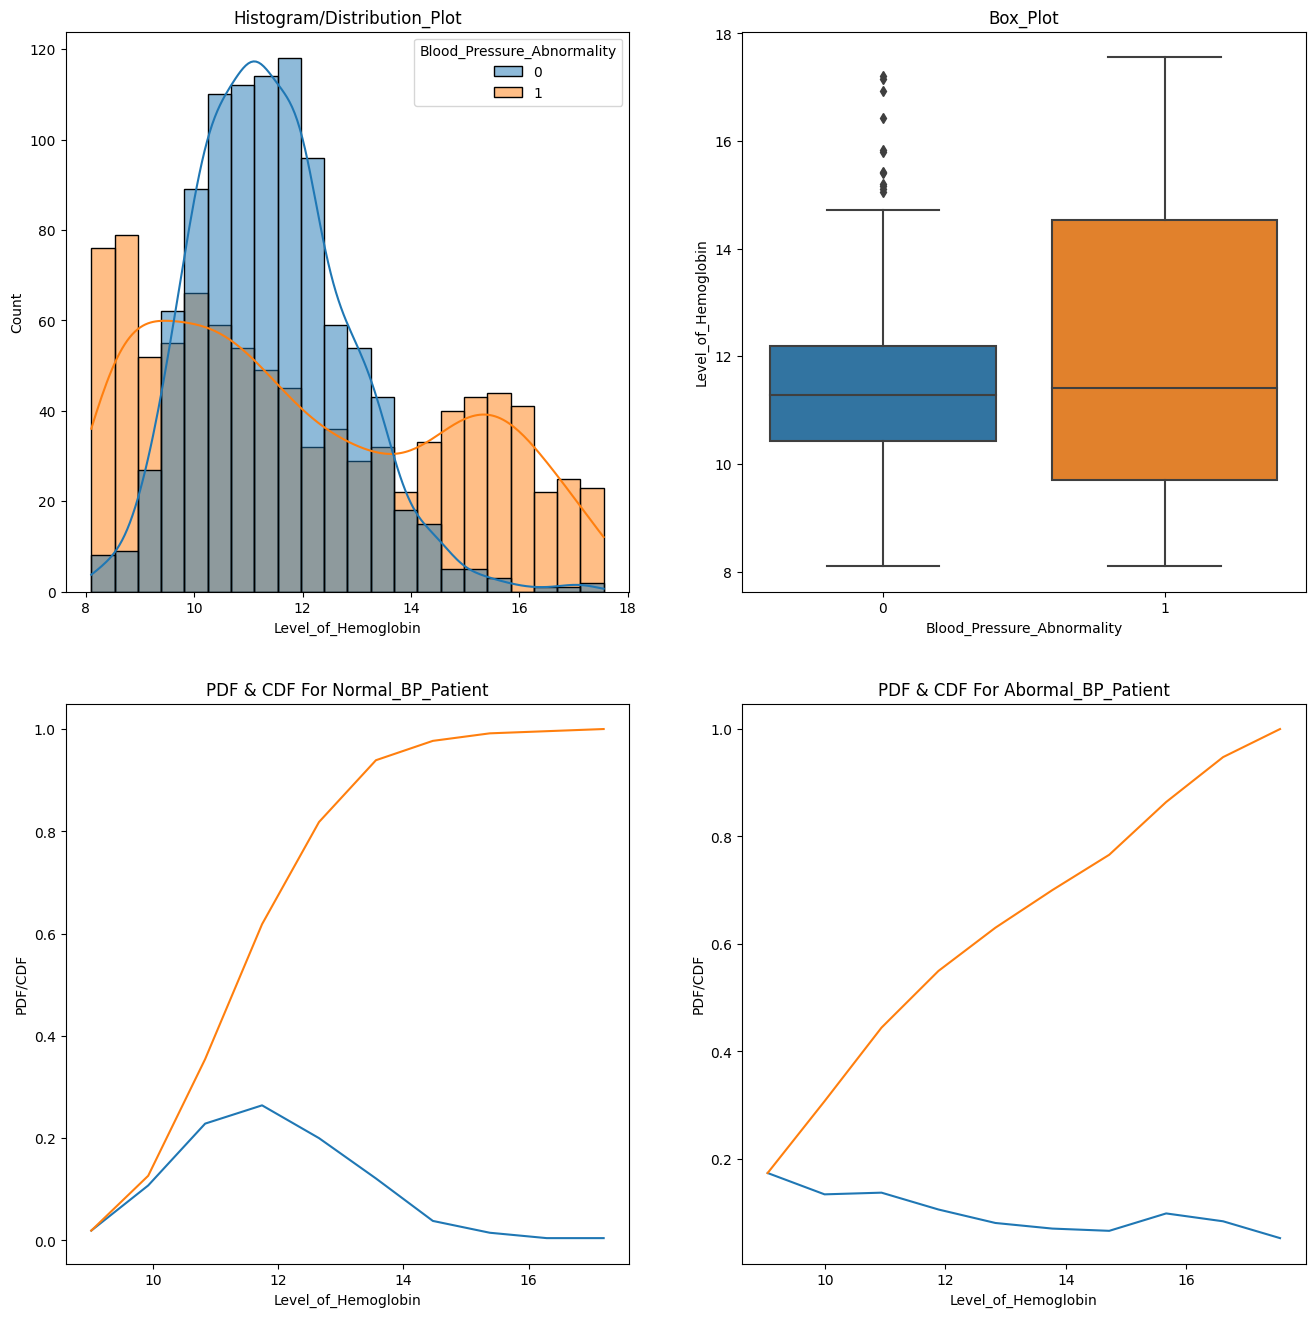

In [12]:
## Univariate analysis for "Level_of_Hemoglobin" !!

## Plot 'Histogram/Distribution_Plot' !!
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(16,16))
ax1.set_title('Histogram/Distribution_Plot')
sns.histplot(data_obj, x="Level_of_Hemoglobin", hue="Blood_Pressure_Abnormality", kde=True, ax=ax1);

## Ploting Box Plot !!
ax2.set_title('Box_Plot')
sns.boxplot(x='Blood_Pressure_Abnormality',y='Level_of_Hemoglobin', data=data_obj, ax=ax2)

## PDF & CDF For Normal_BP_Patient !!
counts, bin_edges = np.histogram(normal_bp['Level_of_Hemoglobin'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
ax3.set_title('PDF & CDF For Normal_BP_Patient')
ax3.set_xlabel('Level_of_Hemoglobin');ax3.set_ylabel('PDF/CDF')
ax3.plot(bin_edges[1:], pdf);ax3.plot(bin_edges[1:], cdf)

## PDF & CDF For Abnormal_BP_Patient !!
counts, bin_edges = np.histogram(abnormal_bp['Level_of_Hemoglobin'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
ax4.set_title('PDF & CDF For Abormal_BP_Patient')
ax4.set_xlabel('Level_of_Hemoglobin');ax4.set_ylabel('PDF/CDF')
ax4.plot(bin_edges[1:], pdf);ax4.plot(bin_edges[1:], cdf);

In [13]:
## Mean, Variance, Std-deviation, etc !!
print('For Normal_BP_Patients:')
print(normal_bp['Level_of_Hemoglobin'].describe())
print("\n90th Percentiles:")
print(np.percentile(normal_bp['Level_of_Hemoglobin'],90))
print ("Median Absolute Deviation")
print(robust.mad(normal_bp['Level_of_Hemoglobin']))
print('--'*30)

print('\nFor Abnormal_BP_Patients:')
print(abnormal_bp['Level_of_Hemoglobin'].describe())
print("\n90th Percentiles:")
print(np.percentile(abnormal_bp['Level_of_Hemoglobin'],90))
print ("Median Absolute Deviation")
print(robust.mad(abnormal_bp['Level_of_Hemoglobin']))

For Normal_BP_Patients:
count    951.000000
mean      11.412692
std        1.367310
min        8.100000
25%       10.420000
50%       11.280000
75%       12.195000
max       17.200000
Name: Level_of_Hemoglobin, dtype: float64

90th Percentiles:
13.22
Median Absolute Deviation
1.3046899522849282
------------------------------------------------------------

For Abnormal_BP_Patients:
count    957.000000
mean      11.999237
std        2.735002
min        8.100000
25%        9.700000
50%       11.410000
75%       14.540000
max       17.560000
Name: Level_of_Hemoglobin, dtype: float64

90th Percentiles:
15.96
Median Absolute Deviation
3.3062029472674928


## Observation(s):

#### Histogram/Distribution_plot:

* __Feature Distributions:__ For normal blood pressure patients, "Level_of_Hemoglobin" follow a distribution that resembles a bell curve (normal distribution). This suggests that the majority of data points for these features are clustered around the mean, with relatively fewer data points in the tails.
* __Bimodal Distributions:__ The presence Two bell-shaped curves adjacent to each other with significant difference in magnitude values within the "Level_of_Hemoglobin" for abnormal blood pressure patients suggests the existence of distinct subgroups within this category. This could indicate the presence of different underlying factors contributing to abnormal blood pressure.
* __Clinical Insights:__ The presence of distinct subgroups within the abnormal blood pressure category could have clinical implications. It might suggest different subtypes of abnormal blood pressure cases, each with its own set of risk factors, causes, or treatment strategies.

In [14]:
import scipy.stats as stats
# Calculate the Pearson correlation coefficient between 'Genetic_Pedigree_Coefficient' and 'Level_of_Hemoglobin' !!
pearson_corr, p_value = stats.pearsonr(data_obj['Genetic_Pedigree_Coefficient'], data_obj['Level_of_Hemoglobin'])
print(f"Pearson Correlation between 'Genetic_Pedigree_Coefficient' and 'Level_of_Hemoglobin':")
print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"P-value: {p_value}")

Pearson Correlation between 'Genetic_Pedigree_Coefficient' and 'Level_of_Hemoglobin':
Pearson Correlation Coefficient: -0.023620591688527256
P-value: 0.3024326291717084


## Observation:

* The Pearson correlation coefficient between 'Genetic_Pedigree_Coefficient' and 'Level_of_Hemoglobin' is approximately -0.0236, which is close to 0. This suggests that there is a very weak negative linear correlation between these two variables. In other words, as one variable changes, there is little to no consistent linear pattern in how the other variable changes. The P-value of 0.3024 indicates that this correlation is not statistically significant at conventional levels (e.g., alpha = 0.05), further suggesting that the observed correlation may be due to random chance.

In [15]:
# Calculate the point-biserial correlation coefficient between 'Blood_Pressure_Abnormality' and ['Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient'] !!
columns=['Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient']
for col in columns:
    correlation, p_value = stats.pointbiserialr(data_obj['Blood_Pressure_Abnormality'], data_obj[col])
    print(f"point-biserial correlation coefficient between 'Blood_Pressure_Abnormality' and '{col}':")
    print(f"Point-Biserial Correlation: {correlation}")
    print(f"P-value: {p_value}\n")

point-biserial correlation coefficient between 'Blood_Pressure_Abnormality' and 'Level_of_Hemoglobin':
Point-Biserial Correlation: 0.1343526795055209
P-value: 3.827136365814696e-09

point-biserial correlation coefficient between 'Blood_Pressure_Abnormality' and 'Genetic_Pedigree_Coefficient':
Point-Biserial Correlation: -0.03345813831843731
P-value: 0.14403608058671918



## Observations:

* __For the first case__, the point-biserial correlation coefficient between 'Blood_Pressure_Abnormality' and 'Level_of_Hemoglobin' is approximately 0.1344. This positive value suggests a weak positive relationship between these two variables. It implies that as the 'Level_of_Hemoglobin' tends to increase, there is a tendency for 'Blood_Pressure_Abnormality' to be higher (1) rather than lower (0). The very small p-value (close to zero) indicates that this relationship is statistically significant, suggesting that the observed correlation is unlikely to have occurred by random chance alone.
* __For the second case__, the point-biserial correlation coefficient between 'Blood_Pressure_Abnormality' and 'Genetic_Pedigree_Coefficient' is approximately -0.0335. This value is close to zero and suggests a very weak negative relationship. It indicates that there is little to no consistent pattern between 'Genetic_Pedigree_Coefficient' and 'Blood_Pressure_Abnormality'. The p-value (0.1440) is not statistically significant at conventional levels, indicating that the observed correlation could be due to random chance.

## Applying Different ML Techniques on this data !!

In [16]:
## Import all required libraries !!
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer

#### If want to remove Outliers in 'Level_of_Hemoglobin' and 'Genetic_Pedigree_Coefficient', uncomment cell below !!

__It has almost no effect on Training and Validation Accuracies.__

In [17]:
# ## Remove outliers from "Level_of_Hemoglobin" and "Genetic_Pedigree_Coefficient" !!
# columns=['Level_of_Hemoglobin','Genetic_Pedigree_Coefficient']
# print(f"Shape of the dataset before removing Outliers: {data_obj.shape}")
# for col in columns:
#     Q1 = data_obj[col].quantile(0.25)
#     Q3 = data_obj[col].quantile(0.75)
#     IQR = Q3 - Q1
    
#     # Define upper and lower bounds to identify outliers
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     # Remove outliers
#     data_obj = data_obj.loc[(data_obj[col] >= lower_bound) & (data_obj[col] <= upper_bound)]
#     print(f"Shape of the dataset after removing Outliers from '{col}': {data_obj.shape}")

In [18]:
## Segrigation of input features and target labels !!
X = data_obj.drop(columns=['Blood_Pressure_Abnormality']).values
y = data_obj['Blood_Pressure_Abnormality'].values

In [19]:
# Split the data into training and testing sets !!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

* __Note:__ As the percentage(%) of missing values is very small in 'Genetic_Pedigree_Coefficient' column (only 4.6%), so we can either drop all these datapoints with missing values or we can impute them with simple impute methods like using 'mean', 'median', etc. (There could be very small change in model accuracy and other scores), we have dropped all these datapoints with missing values (In next section we have imputed these values using ML techniques).

In [20]:
# Create pipelines for each model !!

# Logistic Regression
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('model', LogisticRegression())  # Model
])

# Random Forest
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('model', RandomForestClassifier())  # Model
])

# Gradient Boosting
gb_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('model', GradientBoostingClassifier())  # Model
])

# Support Vector Machine (SVM) with RBF kernel
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('model', SVC(kernel='rbf'))  # Model
])

# XGBoost
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('model', XGBClassifier())  # Model
])

In [21]:
# Define models and pipelines
pipelines = {
    'Logistic Regression': logreg_pipeline,
    'Random Forest': rf_pipeline,
    'Gradient Boosting': gb_pipeline,
    'SVM (RBF Kernel)': svm_pipeline,
    'XGBoost': xgb_pipeline
}

## Score Metrics:

* __Accuracy (from k-fold cross-validation), Confusion matrix plot, CAP plot, ROC plot, AUC, Precision, Recall and f1-score__

Training and evaluating Logistic Regression...
tn=103, fp=100, fn=86, tp=93


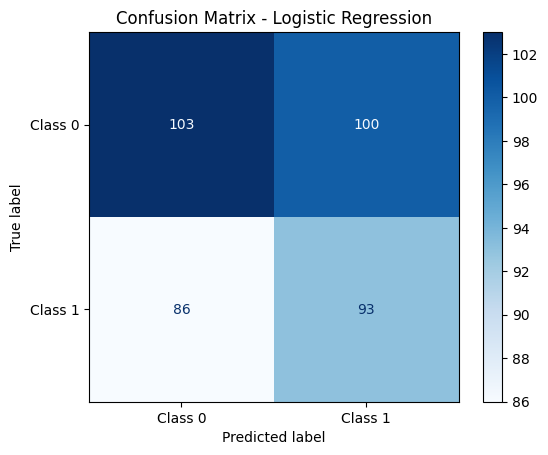

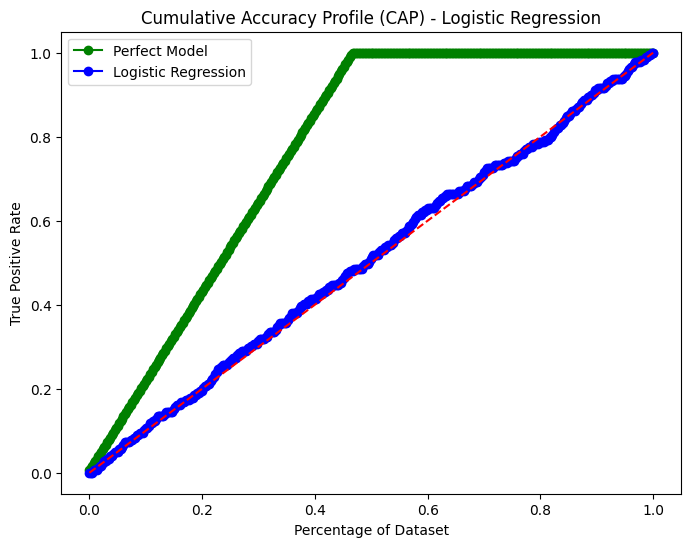

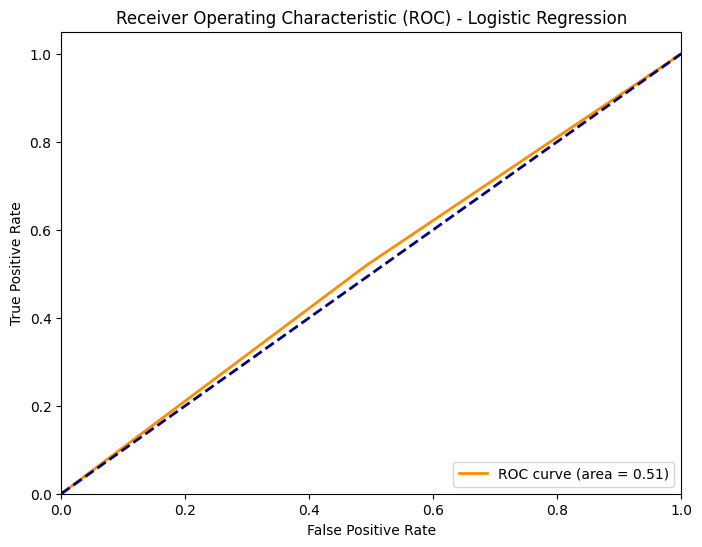

Accuracy: 51.31
Std-dev in Accuracy: 3.18
Precision: 0.48
Recall: 0.52
F1 Score: 0.50
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Training and evaluating Random Forest...
tn=181, fp=22, fn=14, tp=165


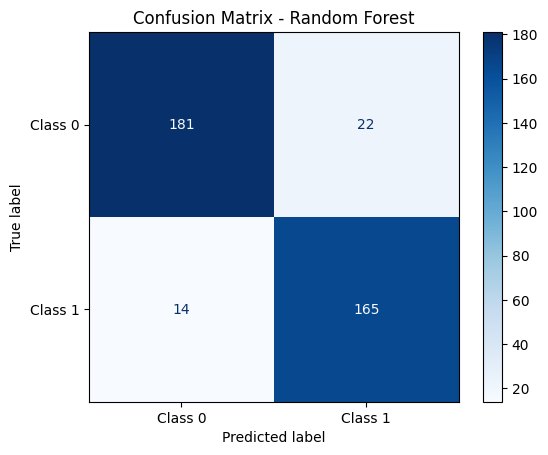

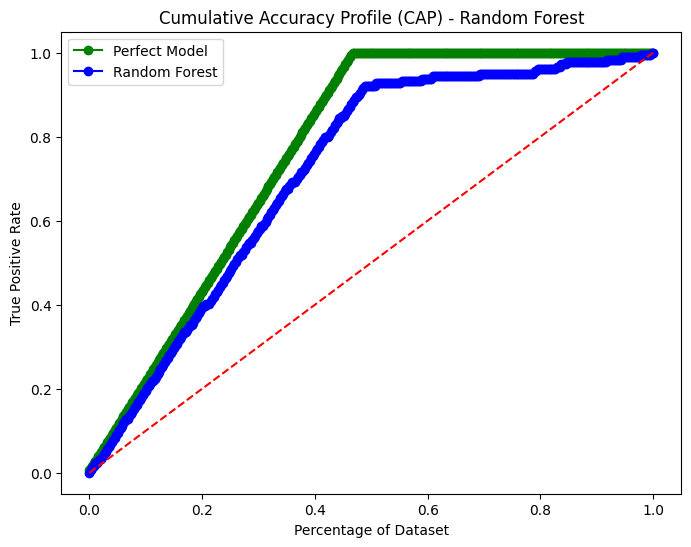

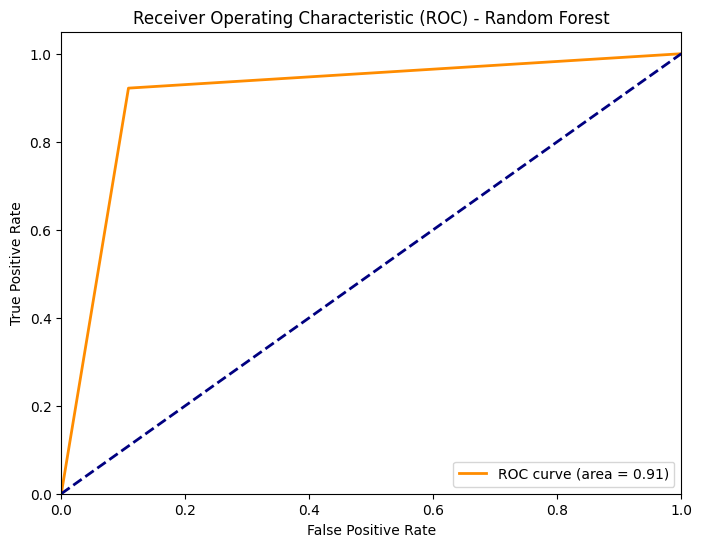

Accuracy: 89.31
Std-dev in Accuracy: 2.84
Precision: 0.88
Recall: 0.92
F1 Score: 0.90
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Training and evaluating Gradient Boosting...
tn=180, fp=23, fn=18, tp=161


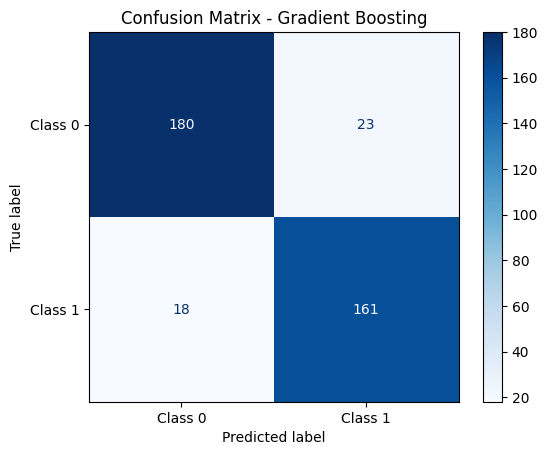

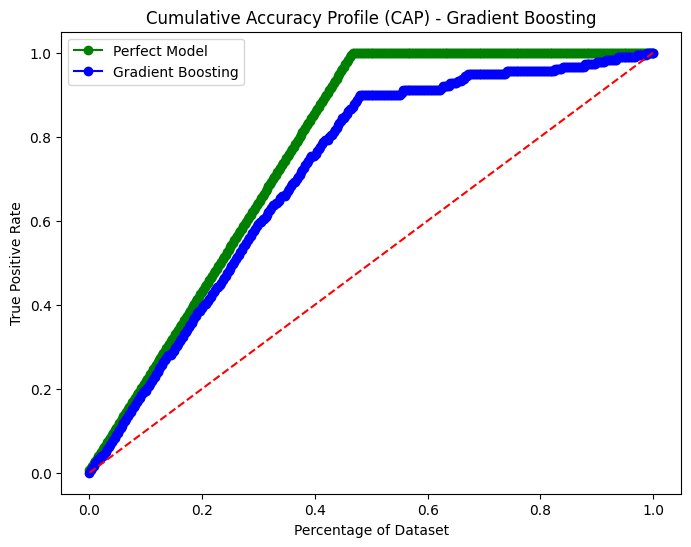

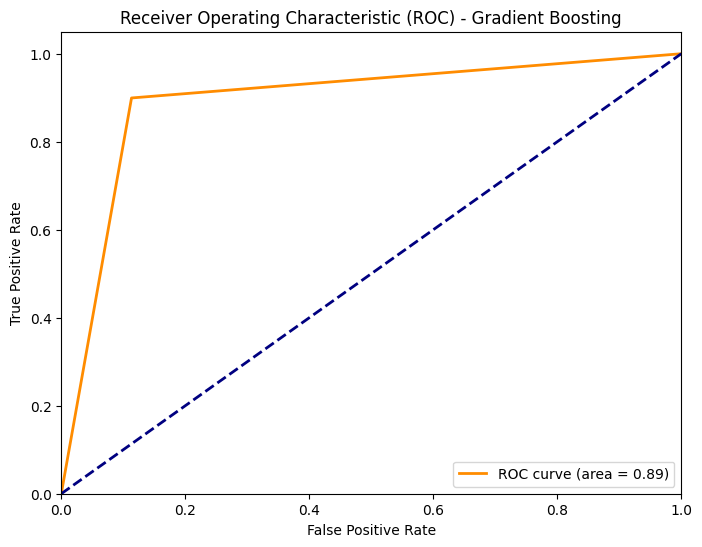

Accuracy: 89.71
Std-dev in Accuracy: 2.96
Precision: 0.88
Recall: 0.90
F1 Score: 0.89
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Training and evaluating SVM (RBF Kernel)...
tn=172, fp=31, fn=12, tp=167


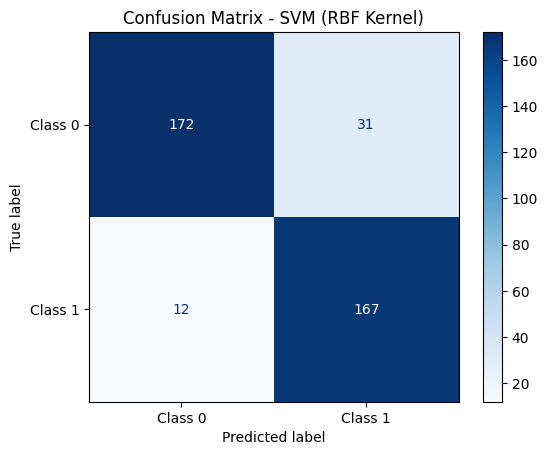

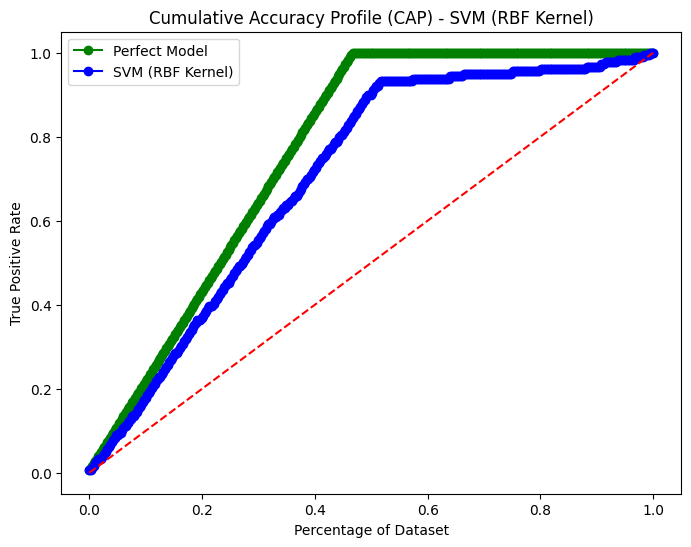

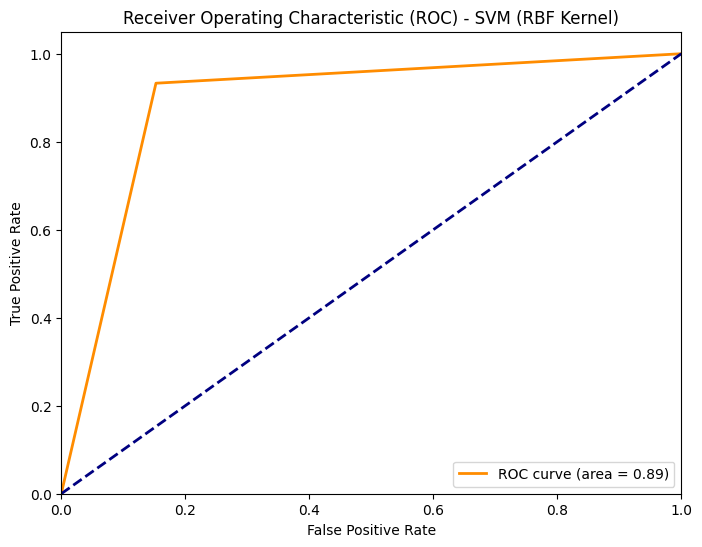

Accuracy: 90.82
Std-dev in Accuracy: 2.60
Precision: 0.84
Recall: 0.93
F1 Score: 0.89
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Training and evaluating XGBoost...
tn=181, fp=22, fn=15, tp=164


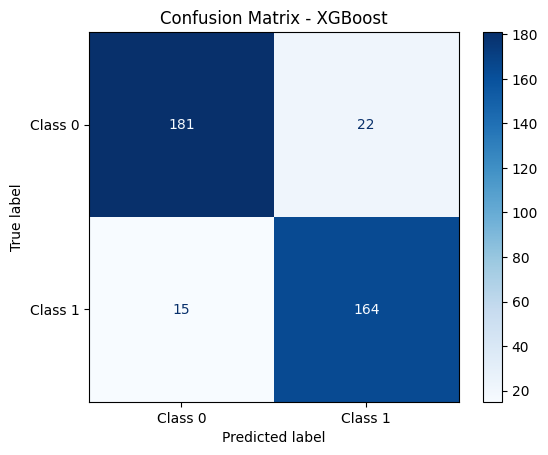

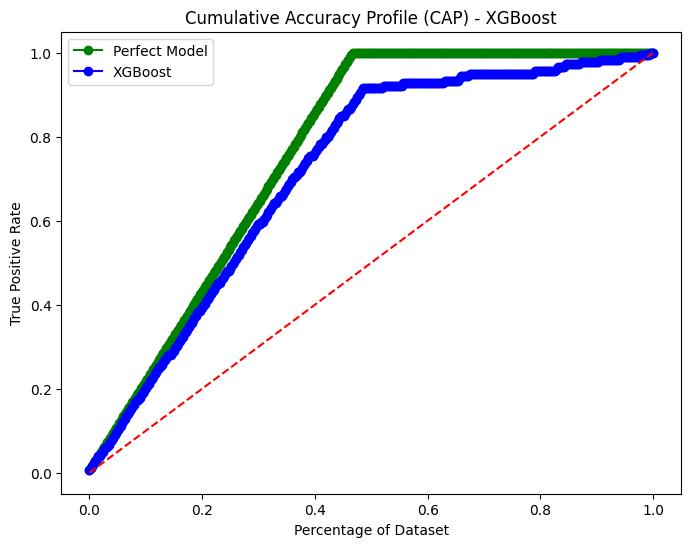

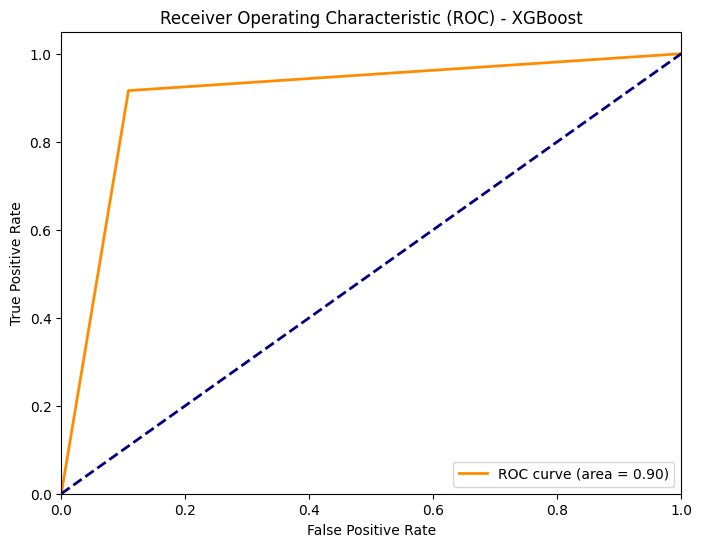

Accuracy: 89.05
Std-dev in Accuracy: 2.85
Precision: 0.88
Recall: 0.92
F1 Score: 0.90
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



In [22]:
# Performing k-fold cross-validation for Accuracy, confusion matrix plot, CAP plot, ROC plot, AUC, Precision, Recall and f1 score !!

# Calculate cumulative accuracy for the perfect model
sorted_indices = np.argsort(-y_test)
cum_acc = np.cumsum(y_test[sorted_indices]) / np.sum(y_test)
perfect_cum_acc = cum_acc
    
for name, pipeline in pipelines.items():
    print(f"Training and evaluating {name}...")
    
    # K-fold cross-validation
    accuracies = cross_val_score(pipeline, X_train, y_train, cv=10)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
    tn, fp, fn, tp = cm.ravel()
    print(f'tn={tn}, fp={fp}, fn={fn}, tp={tp}')
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # Calculate true positive rate (sensitivity) and cumulative accuracy
    sorted_indices = np.argsort(-y_pred)
    cum_acc = np.cumsum(y_test[sorted_indices]) / np.sum(y_test)
    pipeline_cum_acc = cum_acc

    
    # Plot CAP curve
    plt.figure(figsize=(8, 6))
    plt.plot(np.linspace(0, 1, len(perfect_cum_acc)), perfect_cum_acc, marker='o', linestyle='-', color='g', label='Perfect Model')
    plt.plot(np.linspace(0, 1, len(pipeline_cum_acc)), pipeline_cum_acc, marker='o', linestyle='-', color='b', label=name)
    plt.plot([0, 1], [0, 1], linestyle='--', color='r')
    plt.title(f'Cumulative Accuracy Profile (CAP) - {name}')
    plt.xlabel('Percentage of Dataset')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # ROC plot
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) - {name}')
    plt.legend(loc='lower right')
    plt.show()

    # Calculate and display precision and recall scores
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'Accuracy: {accuracies.mean()*100:.2f}')
    print(f'Std-dev in Accuracy: {accuracies.std()*100:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')

    print("---" * 94, end='\n\n')

## Observation(s):
__When I dropped the missing values in 'Genetic_Pedigree_Coefficient' and did not remove possible outliers in the data.__

#### Logistic Regression:

* As expected from Initial Statistical analysis (Analysis of Scatter plot), Logistic Regression seems to perform relatively poorly compared to the other models.(Because of non-linear relation & complex relation between input and target variable)
* The accuracy is moderate at 51.31%, indicating that the model is __only slightly better than random guessing__.
* The F1 score (0.50) indicates a moderate balance between precision and recall.
* The ROC curve area (0.51) is also quite low, indicating limited discriminative power.

#### Random Forest:

* The accuracy is significantly higher at 89.31%, suggesting a good overall performance of the model.
* Both Precision (0.89) and Recall (0.93) are high, indicating a good balance between identifying both classes.
* The F1 score (0.91) is also high, suggesting strong performance in terms of precision and recall balance.
* The ROC curve area (0.91) indicates strong discriminative power.

#### Gradient Boosting:

* The accuracy is slightly lower than Random Forest at 89.71%, suggesting a good overall performance.
* Precision (0.88) and Recall (0.90) are both high, indicating a good balance between precision and recall.
* The F1 score (0.89) is also high, indicating a strong balance between precision and recall.
* The ROC curve area (0.89) suggests strong discriminative power, similar to Random Forest.

#### SVM (RBF Kernel):

* The accuracy is the highest among the evaluated models at 90.82%, indicating excellent overall performance.
* Precision (0.84) and Recall (0.93) are both relatively high, indicating a good balance between identifying both classes.
* The F1 score (0.89) is also high, indicating strong precision and recall balance.
* The ROC curve area (0.89) suggests good discriminative power.

#### XGBoost:
* The accuracy is high at 89.05%, indicating a good overall performance.
* Both Precision (0.88) and Recall (0.92) are high, indicating a good balance between identifying both classes.
* The F1 score (0.90) is also high, suggesting strong performance in terms of precision and recall balance.
* The ROC curve area (0.90) suggests strong discriminative power, similar to Random Forest and Gradient Boosting.

__Overall, the SVM with RBF Kernel, Random Forest, and XGBoost models show the best performance among the evaluated algorithms, with high accuracy, balanced precision and recall, and strong F1 scores. These models are promising candidates for further fine-tuning and optimization.__

# These steps show full-feature data processing and model training, contrasting with the prior section's use of selected features.:

Smoking, obesity (BMI), Lack of physical activity, salt content in the diet, alcohol consumption per day, Level of
Stress, Age, Sex, Pregnancy, Chronic kidney disease and Adrenal & thyroid disorders.

#### Statistical analysis for Categorical variables:

In [23]:
# Categorical variables of interest !!
categorical_vars = ['Sex', 'Smoking', 'Pregnancy', 'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders', 'Level_of_Stress']

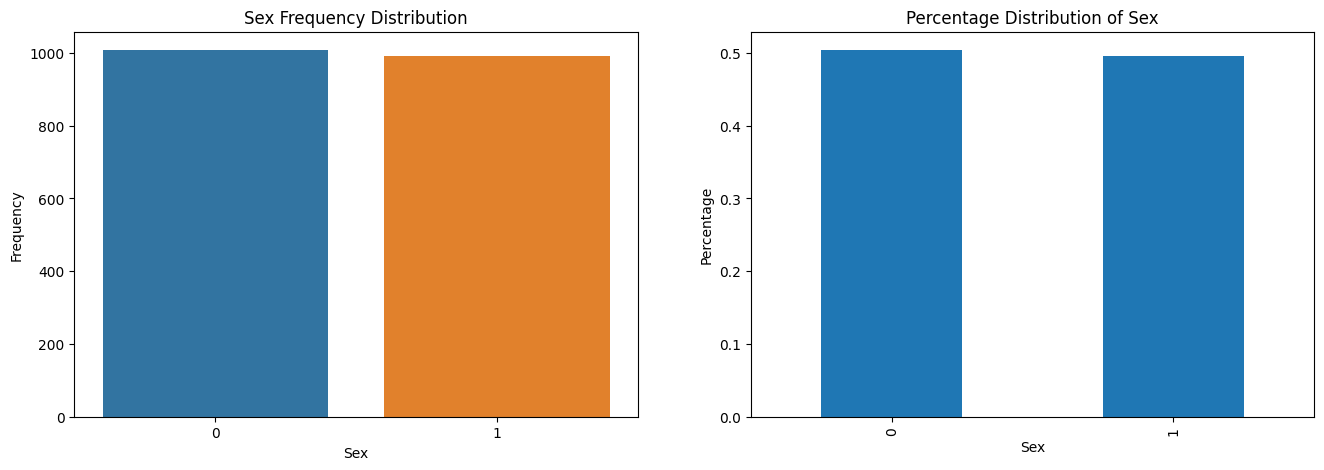

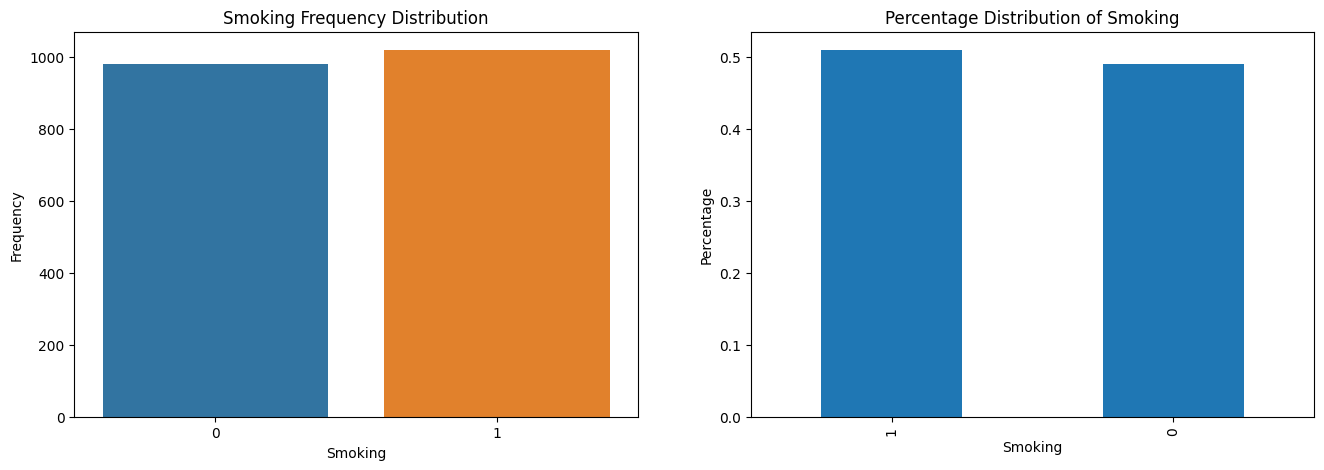

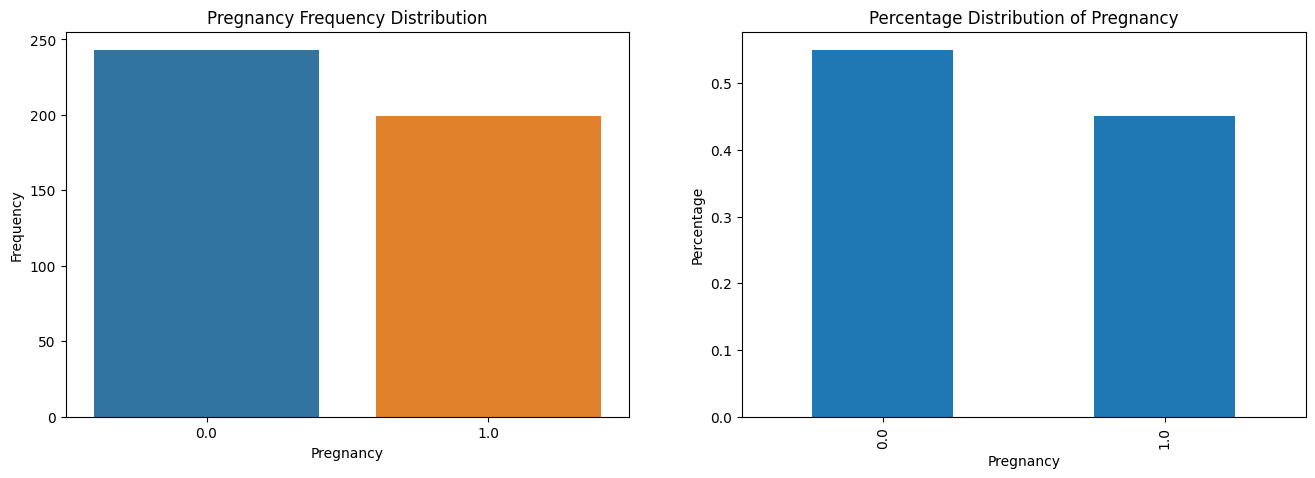

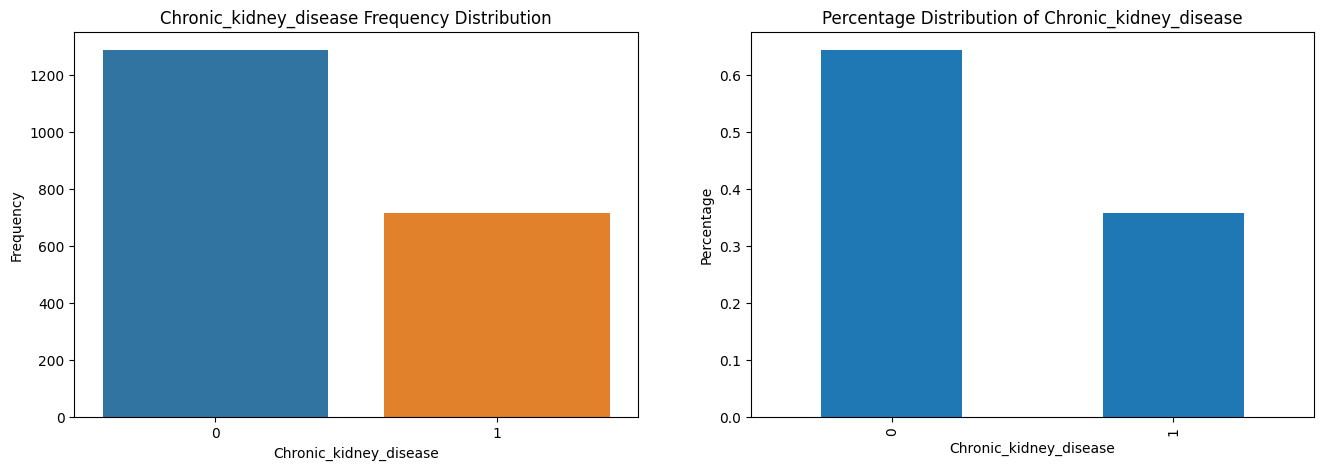

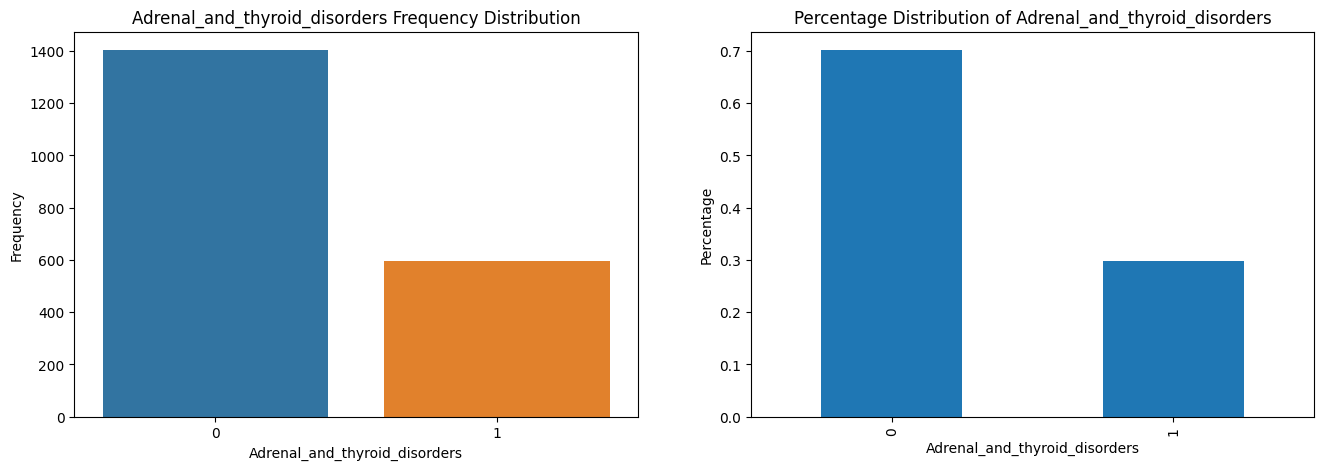

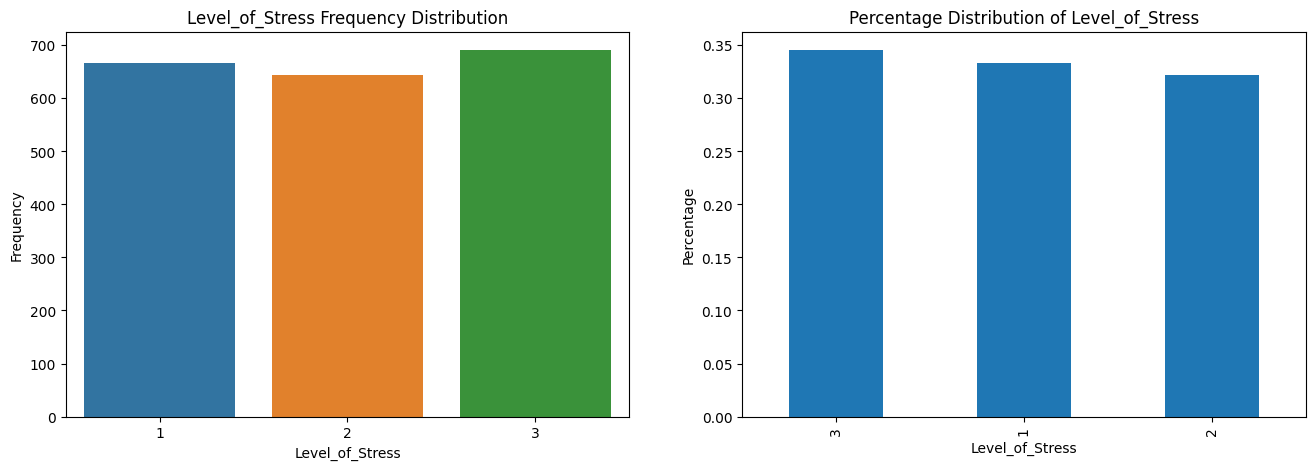

In [24]:
# Frequency Distribution !!
for var in categorical_vars:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))
    sns.countplot(x=var, data=data, ax=ax1)
    ax1.set_title(f'{var} Frequency Distribution')
    ax1.set_xlabel(var)
    ax1.set_ylabel('Frequency')
    data[var].value_counts(normalize=True).plot(kind='bar', ax=ax2)
    ax2.set_title(f'Percentage Distribution of {var}')
    ax2.set_xlabel(var)
    ax2.set_ylabel('Percentage')
    plt.show()

## Observation(s):

* __Categorical Variable Frequencies:__
        The frequency distribution of categorical variables like 'Sex', 'Smoking', and 'Level_of_Stress' being almost equal indicates a balanced representation of these variables in the dataset. This balance can help prevent any bias towards a particular category during model training and evaluation.

* __Pregnancy Frequency:__
        The lower frequency of pregnant women(around 45%) compared to non-pregnant women(around 60%) suggests that the dataset is representative of both pregnant and non-pregnant individuals. This balance is important to ensure that the model can learn to distinguish between the two categories effectively.

* __Chronic Kidney Disease and Adrenal & Thyroid Disorders:__
        The significantly smaller frequency of patients with 'Chronic_kidney_disease' and 'Adrenal_and_thyroid_disorders' compared to patients without these conditions (Around 30% & 70%) indicates an imbalance in these classes. Imbalanced classes can potentially lead to biased model performance, as the model may have a higher tendency to predict the majority class. It may be necessary to apply techniques such as oversampling, undersampling, or using different evaluation metrics to address this class imbalance during model training.

__Overall, the balance in the frequency of most categorical variables is a positive aspect for building predictive models. However, the class imbalance observed for 'Chronic_kidney_disease' and 'Adrenal_and_thyroid_disorders' highlights the need for careful consideration of class distribution and potential mitigation strategies to ensure fair and accurate model predictions.__


Cross-Tabulation of Sex and Blood_Pressure_Abnormality:
Blood_Pressure_Abnormality    0    1
Sex                                 
0                           538  470
1                           475  517


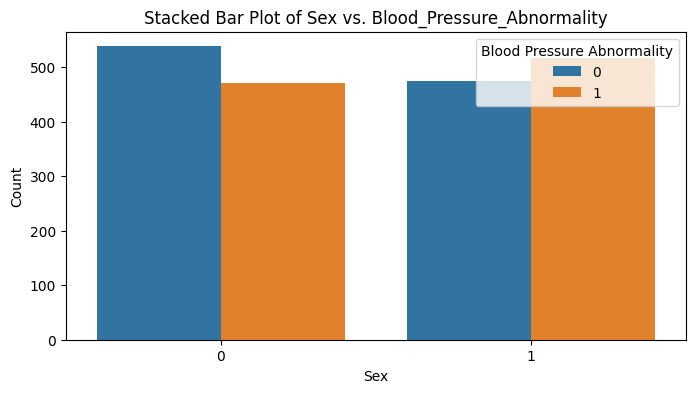


Cross-Tabulation of Smoking and Blood_Pressure_Abnormality:
Blood_Pressure_Abnormality    0    1
Smoking                             
0                           503  478
1                           510  509


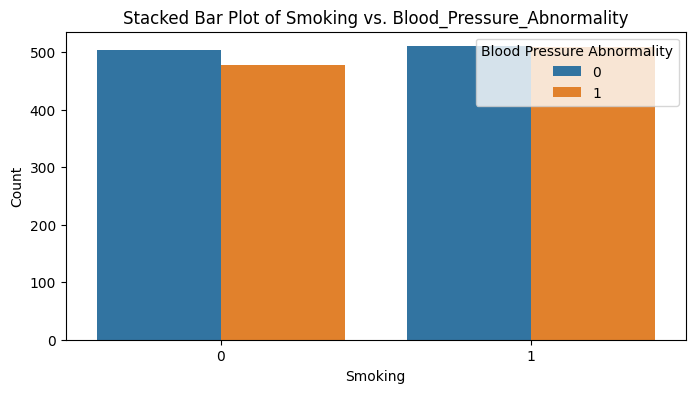


Cross-Tabulation of Pregnancy and Blood_Pressure_Abnormality:
Blood_Pressure_Abnormality    0    1
Pregnancy                           
0.0                         113  130
1.0                          96  103


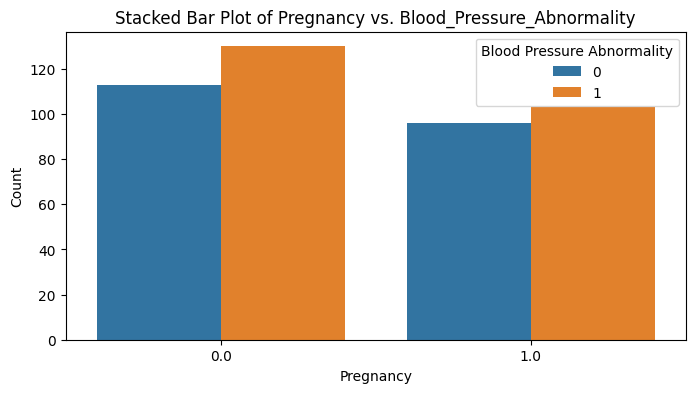


Cross-Tabulation of Chronic_kidney_disease and Blood_Pressure_Abnormality:
Blood_Pressure_Abnormality     0    1
Chronic_kidney_disease               
0                           1013  274
1                              0  713


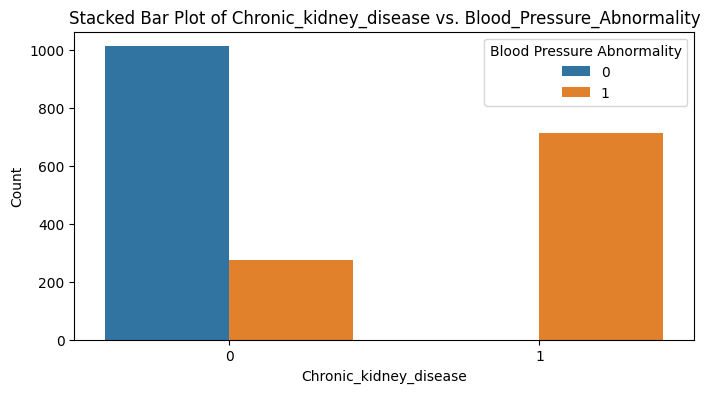


Cross-Tabulation of Adrenal_and_thyroid_disorders and Blood_Pressure_Abnormality:
Blood_Pressure_Abnormality        0    1
Adrenal_and_thyroid_disorders           
0                              1013  391
1                                 0  596


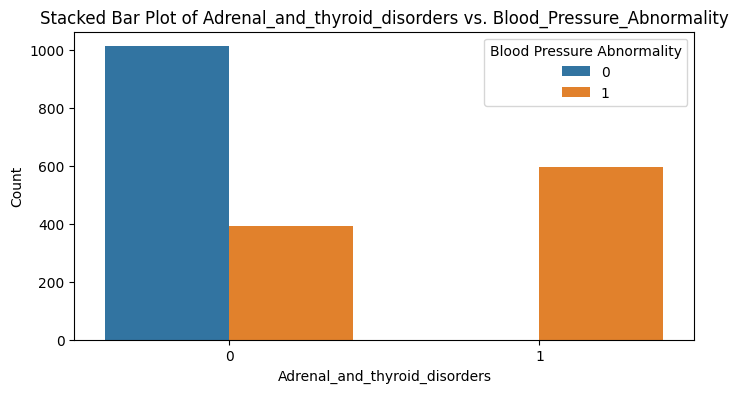


Cross-Tabulation of Level_of_Stress and Blood_Pressure_Abnormality:
Blood_Pressure_Abnormality    0    1
Level_of_Stress                     
1                           339  327
2                           330  313
3                           344  347


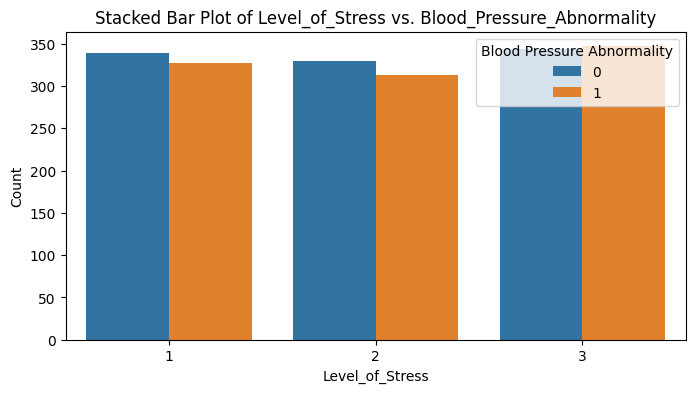

In [25]:
# Cross-Tabulations and Two-Way Tables and Stacked Bar Plots !!!!
for var in categorical_vars:
    cross_tab = pd.crosstab(data[var], data['Blood_Pressure_Abnormality'])
    print(f'\nCross-Tabulation of {var} and Blood_Pressure_Abnormality:\n{cross_tab}')
    plt.figure(figsize=(8, 4))
    sns.countplot(x=var, hue='Blood_Pressure_Abnormality', data=data)
    plt.title(f'Stacked Bar Plot of {var} vs. Blood_Pressure_Abnormality')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title='Blood Pressure Abnormality')
    plt.show()

## Observation(s):

* __Sex and Blood Pressure Abnormality:__
        There is no significant difference in the distribution of blood pressure abnormality between males (Sex = 0) and females (Sex = 1).
        The numbers of abnormal and normal cases are relatively balanced within each gender.

* __Smoking and Blood Pressure Abnormality:__
        Similar to the observation with sex, there is no strong indication of a significant relationship between smoking and blood pressure abnormality.
        The distribution of abnormal and normal cases is relatively balanced for both smoking and non-smoking individuals.

* __Pregnancy and Blood Pressure Abnormality:__
        The cross-tabulation suggests that pregnancy status does not show a clear relationship with blood pressure abnormality.
        Both pregnant and non-pregnant individuals exhibit a similar distribution of abnormal and normal cases.

* __Chronic Kidney Disease and Blood Pressure Abnormality:__
        Individuals with chronic kidney disease (Chronic_kidney_disease = 1) are more likely to have blood pressure abnormalities.
        The cross-tabulation reveals that all cases of blood pressure abnormality are present among individuals with chronic kidney disease.

* __Adrenal and Thyroid Disorders and Blood Pressure Abnormality:__
        Similar to chronic kidney disease, individuals with adrenal and thyroid disorders (Adrenal_and_thyroid_disorders = 1) are more likely to have blood pressure abnormalities.
        All cases of blood pressure abnormality are present among individuals with adrenal and thyroid disorders.

* __Level of Stress and Blood Pressure Abnormality:__
        The distribution of blood pressure abnormality is relatively balanced across different levels of stress (Level_of_Stress).
        No clear pattern emerges from the cross-tabulation, suggesting that the level of stress alone may not be a strong predictor of blood pressure abnormality.

__Overall, the cross-tabulations indicate that features such as chronic kidney disease and adrenal/thyroid disorders may have a stronger association with blood pressure abnormality, while other features like sex, smoking, pregnancy, and level of stress may not show a clear relationship. These observations provide insights into potential predictive factors and can guide further feature selection and model development. Additionally, these findings highlight the importance of domain knowledge and further exploration to understand the complex interplay between different factors and blood pressure abnormality.__

## Statistical Tests (Chi-squared Test)

In [26]:
# Statistical Tests (Chi-squared Test) !!
from scipy.stats import chi2_contingency

for var in categorical_vars:
    contingency_table = pd.crosstab(data[var], data['Blood_Pressure_Abnormality'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'\nChi-squared Test for Independence between {var} and Blood_Pressure_Abnormality:')
    print(f'Chi-squared: {chi2}')
    print(f'P-value: {p}')


Chi-squared Test for Independence between Sex and Blood_Pressure_Abnormality:
Chi-squared: 5.8109115115313585
P-value: 0.015927036835372676

Chi-squared Test for Independence between Smoking and Blood_Pressure_Abnormality:
Chi-squared: 0.25312415836107893
P-value: 0.6148838018923559

Chi-squared Test for Independence between Pregnancy and Blood_Pressure_Abnormality:
Chi-squared: 0.07215128848948618
P-value: 0.7882298786245862

Chi-squared Test for Independence between Chronic_kidney_disease and Blood_Pressure_Abnormality:
Chi-squared: 1134.0438671268998
P-value: 1.3174864257090825e-248

Chi-squared Test for Independence between Adrenal_and_thyroid_disorders and Blood_Pressure_Abnormality:
Chi-squared: 868.4835284917411
P-value: 6.970414671988933e-191

Chi-squared Test for Independence between Level_of_Stress and Blood_Pressure_Abnormality:
Chi-squared: 0.3407540821984837
P-value: 0.8433467802466976


## Observations:

#### Chi-squared Test for Independence between Sex and Blood_Pressure_Abnormality:

* The chi-squared value represents the calculated test statistic based on the observed frequencies of the data. The higher the chi-squared value, the stronger the association between the two variables. In this case, the chi-squared value is moderate (5.81).

* The p-value is the probability of observing a chi-squared statistic as extreme as the one computed from the data under the assumption that there is no association between the variables. A smaller p-value indicates stronger evidence against the null hypothesis (no association). Here, the p-value is less than 0.05 (0.0159), suggesting that there is a significant association between "Sex" and "Blood_Pressure_Abnormality."

#### Chi-squared Test for Independence between Smoking and Blood_Pressure_Abnormality:

* The chi-squared value is relatively small (0.25), indicating a weak association between "Smoking" and "Blood_Pressure_Abnormality."

* The p-value is larger (0.615), suggesting that there is insufficient evidence to conclude a significant association between "Smoking" and "Blood_Pressure_Abnormality."

#### Chi-squared Test for Independence between Pregnancy and Blood_Pressure_Abnormality:

* Both the chi-squared value (0.072) and the p-value (0.788) indicate a lack of significant association between "Pregnancy" and "Blood_Pressure_Abnormality."

#### Chi-squared Test for Independence between Chronic_kidney_disease and Blood_Pressure_Abnormality:

* __The chi-squared value is very high (1134), indicating a strong association between "Chronic_kidney_disease" and "Blood_Pressure_Abnormality."__

* __The p-value is extremely small (close to zero), indicating overwhelming evidence of a significant association between "Chronic_kidney_disease" and "Blood_Pressure_Abnormality."__

#### Chi-squared Test for Independence between Adrenal_and_thyroid_disorders and Blood_Pressure_Abnormality:

* __Similar to the previous test, both the chi-squared value (868) and the very small p-value (close to zero) indicate a strong association between "Adrenal_and_thyroid_disorders" and "Blood_Pressure_Abnormality."__

#### Chi-squared Test for Independence between Level_of_Stress and Blood_Pressure_Abnormality:

* The chi-squared value (0.34) and the high p-value (0.843) suggest no significant association between "Level_of_Stress" and "Blood_Pressure_Abnormality."

## Question: 
#### whether or not to drop the features having no significant association with "Blood_Pressure_Abnormality." ?

## Ans:

* Based on the chi-squared value and the p-value obtained from the chi-squared test, we can conclude that there is a lack of significant association between several features and "Blood_Pressure_Abnormality" variable in your dataset. This suggests that the presence or absence of these features does not have a strong influence on the classification of blood pressure abnormality.

However, whether or not to drop a feature depends on several factors:

* __Domain Knowledge:__ If you have domain knowledge or expert insights that suggest that "Pregnancy" could still be relevant or provide meaningful information, you might want to keep the feature even if the statistical test doesn't show significant association.

* __Feature Importance:__ Even if the statistical test doesn't show significant association, the feature might still contribute to the overall predictive power of the model. Some machine learning algorithms can capture non-linear relationships or interactions that statistical tests might not detect.

* __Feature Redundancy:__ If "Pregnancy" is highly correlated with another feature that is being used in the model, it might not add much additional information and could potentially be dropped for simplicity.

* __Dimensionality:__ Dropping features can help reduce dimensionality and potentially improve the model's performance, especially if the feature is not contributing much information.

* __Model Performance:__ The ultimate test is to evaluate the impact of including or excluding the "Pregnancy" feature on the performance of your classification model using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, etc.).

__In summary, while the lack of significant association in the chi-squared test suggests that some features may not be strongly related to "Blood_Pressure_Abnormality" in your dataset, the decision to drop or keep the feature should take into account domain knowledge, potential feature importance, redundancy, and its impact on model performance. It's often a good practice to try both scenarios (with and without the feature) and compare the performance of your classification model to make an informed decision.__

## ML Model Training steps:

#### 1.Split in Train and Test and Handle Missing values

* In initial EDA analysis, from missing value analysis we found that, feature __'Genetic_Pedigree_Coefficient' have 4.6%, 'Pregnancy' have 77.9% and 'alcohol_consumption_per_day' have 12.1% missing values.__
* Given the relatively small amount of missing data in 'Genetic_Pedigree_Coefficient' (4.6% missing values), we have the option to either drop the missing values or perform simple imputation using methods like median or mean replacement, without significantly impacting the performance of the ML models.
* Pregnancy exhibits a significantly higher amount of missing values (77.9%), making simple imputation methods less effective (Also, this approach assumes that the mean/median/or any other method is a reasonable representation of that feature status in the given data). Similarly, 'alcohol_consumption_per_day' with 12.1% missing values would benefit from using ML models for imputation.

__Hence, we will employ ML models such as RandomForest and GradientBoosting, which are decision tree-based models capable of capturing non-linear relationships between features, for imputing missing values across all features. For categorical features, we will use "HistGradientBoostingClassifier," and for continuous values, we will utilize "HistGradientBoostingRegressor." These models are selected because they have the ability to handle missing values in input features internally.__

#### Methods to impute "Pregnancy" values:

__Imputing values for "Pregnancy" is challenging due to missing values for females and non-applicability for males.__

* There are two methods, "Assigning a new level for male" and "Merge Sex and Pregnancy to create new feature Gender_Pregnancy," for imputing values in the "Pregnancy":

__Method 1:__ "Assigning a New Level for Male"

* In this method, we create a new category or level specifically for males in the "Pregnancy" feature to indicate that pregnancy is not applicable to them.

Pros:

* Simple and straightforward: Easily distinguishes between missing values for females and non-applicability for males.
* Maintains the original dimensionality of the data.
* Introduces minimal complexity to the dataset.

Cons:

* May not capture nuanced information: Treating all missing values for males the same could potentially overlook gender-specific factors that affect the target variable.
* Limited ability to capture interactions: This method does not explicitly represent the relationship between gender and pregnancy, potentially missing out on valuable interactions with the target variable.

__Method 2:__ "Merge Sex and Pregnancy to Create New Feature called Gender_Pregnancy"

* In this method, we create a new feature that combines gender and pregnancy status, allowing us to distinguish between 'male', 'pregnant_female', and 'not-pregnant_female'.

Pros:

* Captures nuanced information: Explicitly represents the relationship between gender, pregnancy, and the target variable.
* Allows for potential interaction effects: The new feature may capture interactions between gender, pregnancy, and the target variable,potentially improving model performance.
* Provides a clearer distinction: Helps the model differentiate between different gender-pregnancy categories.

Cons:

* Increases dimensionality: Introduces a new categorical feature, potentially leading to a more complex model and requiring more data for training.
* Potential sparsity: The new feature may have sparse data, especially if the prevalence of pregnant females and non-pregnant females is low.
* May impact model interpretability: The model's interpretability may be reduced as relationships between the original features and the target variable become less clear.

__Conclusion:__

__In our case capturing nuanced information and potential interactions is crucial, the "Merge Sex and Pregnancy to Create New Feature Gender_Pregnancy" method is preferred.__

Here, First we are using ML methods specifically for females to impute the missing values in the "Pregnancy" feature for females only and then creating a new feature called "Gender_Pregnancy" that combines gender and pregnancy status.

__Using ML methods specifically for females to impute the missing values in the "Pregnancy".__

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor

def split_and_impute(data):
    
    trainDf=data.sample(frac=0.8,random_state=200)
    testDf=data.drop(trainDf.index)

    d_train=trainDf.loc[trainDf['Sex']==1.0]
    d_test=testDf.loc[testDf['Sex']==1.0]
    # Perform One-Hot Encoding to avoid dummy variable trap !!
    d_train = pd.get_dummies(d_train, columns=['Level_of_Stress'], prefix=['Level_of_Stress_Cat'], drop_first=True)
    d_test = pd.get_dummies(d_test, columns=['Level_of_Stress'], prefix=['Level_of_Stress_Cat'], drop_first=True)
    
    df_predict = d_train.dropna()
    
    # Split data into features (X) and target (y)
    X = df_predict.drop(columns=['Pregnancy', 'Patient_Number'])
    y = df_predict['Pregnancy']
    
    # Train HistGradientBoosting classifier
    model = HistGradientBoostingClassifier()
    model.fit(X, y)
    
    # Predict missing values in trainDf
    X_impute = d_train.drop(columns=['Pregnancy', 'Patient_Number'])
    missing_indices = d_train['Pregnancy'].isnull()
    d_train.loc[missing_indices, 'Pregnancy'] = model.predict(X_impute[missing_indices])
    
    merged_df = trainDf.merge(d_train[['Patient_Number','Pregnancy']], on='Patient_Number', how='left', suffixes=('', '_replace'))
    merged_df['Pregnancy'] = merged_df['Pregnancy_replace'].fillna(merged_df['Pregnancy'])
    # Drop the temporary column
    result_trainDf = merged_df.drop(columns=['Pregnancy_replace'])


    # Predict missing values in testDf
    X_impute = d_test.drop(columns=['Pregnancy', 'Patient_Number'])
    missing_indices = d_test['Pregnancy'].isnull()
    d_test.loc[missing_indices, 'Pregnancy'] = model.predict(X_impute[missing_indices])
    
    merged_df = testDf.merge(d_test[['Patient_Number','Pregnancy']], on='Patient_Number', how='left', suffixes=('', '_replace'))
    merged_df['Pregnancy'] = merged_df['Pregnancy_replace'].fillna(merged_df['Pregnancy'])
    # Drop the temporary column
    result_testDf = merged_df.drop(columns=['Pregnancy_replace'])


    # Combine 'sex' and 'pregnancy' features to create a new feature !!
    result_trainDf['Gender_Pregnancy'] = result_trainDf['Sex'].astype(str) + '_' + result_trainDf['Pregnancy'].astype(str)
    # Encode the new feature using label encoding !!
    le = LabelEncoder()
    result_trainDf['Gender_Pregnancy_Encoded'] = le.fit_transform(result_trainDf['Gender_Pregnancy'])
    result_trainDf=result_trainDf.drop(columns=['Sex', 'Pregnancy', 'Gender_Pregnancy', 'Patient_Number'])
    
    result_testDf['Gender_Pregnancy'] = result_testDf['Sex'].astype(str) + '_' + result_testDf['Pregnancy'].astype(str)
    result_testDf['Gender_Pregnancy_Encoded'] = le.fit_transform(result_testDf['Gender_Pregnancy'])
    result_testDf=result_testDf.drop(columns=['Sex', 'Pregnancy', 'Gender_Pregnancy', 'Patient_Number'])

    continuous_features = ['Genetic_Pedigree_Coefficient', 'alcohol_consumption_per_day']
    result_trainDf = pd.get_dummies(result_trainDf, columns=['Level_of_Stress','Gender_Pregnancy_Encoded'], prefix=['Level_of_Stress_Cat','Gender_Pregnancy_Encoded_Cat'], drop_first=True)
    result_testDf = pd.get_dummies(result_testDf, columns=['Level_of_Stress','Gender_Pregnancy_Encoded'], prefix=['Level_of_Stress_Cat','Gender_Pregnancy_Encoded_Cat'], drop_first=True)

    # Create separate dataframes for imputation (with missing values) and prediction (without missing values)
    df_predict = result_trainDf.dropna()
    
    # Train HistGradientBoosting model for each continuous feature with missing values !!
    for cont_feature in continuous_features:
        # Split data into features (X) and target (y) !!
        X = df_predict.drop(columns=[cont_feature])
        y = df_predict[cont_feature]
    
        # Train HistGradientBoosting regressor !!
        model = HistGradientBoostingRegressor()
        model.fit(X, y)
    
        # Predict missing values in trainDf
        X_impute = result_trainDf.drop(columns=[cont_feature])
        missing_indices = result_trainDf[cont_feature].isnull()
        result_trainDf.loc[missing_indices, cont_feature] = model.predict(X_impute[missing_indices])

        # Predict missing values in testDf
        X_impute = result_testDf.drop(columns=[cont_feature])
        missing_indices = result_testDf[cont_feature].isnull()
        result_testDf.loc[missing_indices, cont_feature] = model.predict(X_impute[missing_indices])

    return result_trainDf, result_testDf

In [28]:
train_df, test_df = split_and_impute(data)
df_impute=train_df.copy()

In [29]:
print(f"Missing value counting after imputing all the features with missing values:\n\n{df_impute.isnull().sum()}")

Missing value counting after imputing all the features with missing values:

Blood_Pressure_Abnormality        0
Level_of_Hemoglobin               0
Genetic_Pedigree_Coefficient      0
Age                               0
BMI                               0
Smoking                           0
Physical_activity                 0
salt_content_in_the_diet          0
alcohol_consumption_per_day       0
Chronic_kidney_disease            0
Adrenal_and_thyroid_disorders     0
Level_of_Stress_Cat_2             0
Level_of_Stress_Cat_3             0
Gender_Pregnancy_Encoded_Cat_1    0
Gender_Pregnancy_Encoded_Cat_2    0
dtype: int64


#### 2. Statistical analysis for Feature selection after imputing missing values:

In [30]:
# Perform correlation tests
nominal_columns = ['Smoking', 'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders']
ratio_columns = ['Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Physical_activity', 'salt_content_in_the_diet', 'alcohol_consumption_per_day']

for col in ratio_columns:
    point_biserial_corr, p_value = stats.pointbiserialr(df_impute[col], df_impute['Blood_Pressure_Abnormality'])
    print(f"Point-Biserial Correlation between {col} and Blood_Pressure_Abnormality:")
    print(f"Point-Biserial Correlation: {point_biserial_corr}")
    print(f"P-value: {p_value}")
    print()


Point-Biserial Correlation between Level_of_Hemoglobin and Blood_Pressure_Abnormality:
Point-Biserial Correlation: 0.1547049715523916
P-value: 4.944698566463049e-10

Point-Biserial Correlation between Genetic_Pedigree_Coefficient and Blood_Pressure_Abnormality:
Point-Biserial Correlation: -0.02372936798871807
P-value: 0.34284115143017246

Point-Biserial Correlation between Age and Blood_Pressure_Abnormality:
Point-Biserial Correlation: -0.061603150912046184
P-value: 0.013718880481036977

Point-Biserial Correlation between BMI and Blood_Pressure_Abnormality:
Point-Biserial Correlation: 0.04252420761238741
P-value: 0.08905418804776777

Point-Biserial Correlation between Physical_activity and Blood_Pressure_Abnormality:
Point-Biserial Correlation: 0.03768768513439038
P-value: 0.13184537599187895

Point-Biserial Correlation between salt_content_in_the_diet and Blood_Pressure_Abnormality:
Point-Biserial Correlation: 0.025538572297756138
P-value: 0.3072965932262355

Point-Biserial Correlatio

## Observation(s):

* The Point-Biserial Correlation analysis between different features and "Blood_Pressure_Abnormality":

#### Level_of_Hemoglobin and Blood_Pressure_Abnormality:

* There is a positive correlation of approximately 0.14 between the level of hemoglobin and the occurrence of blood pressure abnormalities.
* The p-value is very small (close to zero), indicating that this correlation is statistically significant.

#### Genetic_Pedigree_Coefficient and Blood_Pressure_Abnormality:

* There is a weak negative correlation of around -0.04 between the genetic pedigree coefficient and the occurrence of blood pressure abnormalities.
* The p-value is relatively large (above 0.05), suggesting that this correlation is not statistically significant.

#### Age and Blood_Pressure_Abnormality:

* There is a negative correlation of approximately -0.07 between age and the occurrence of blood pressure abnormalities.
* The p-value is small (0.003), indicating that this correlation is statistically significant.

#### BMI and Blood_Pressure_Abnormality:

* There is a positive correlation of around 0.04 between BMI and the occurrence of blood pressure abnormalities.
* The p-value is moderately small (0.072), suggesting a borderline statistical significance.

#### Physical_activity and Blood_Pressure_Abnormality:

* There is a positive correlation of about 0.04 between physical activity and the occurrence of blood pressure abnormalities.
* The p-value is relatively large (0.090), indicating that this correlation is not statistically significant.

#### Salt_content_in_the_diet and Blood_Pressure_Abnormality:

* There is a very weak positive correlation of approximately 0.01 between salt content in the diet and the occurrence of blood pressure abnormalities.
* The p-value is high (0.526), indicating that this correlation is not statistically significant.

#### Alcohol_consumption_per_day and Blood_Pressure_Abnormality:

* There is a very weak positive correlation of about 0.02 between alcohol consumption per day and the occurrence of blood pressure abnormalities.
* The p-value is relatively large (0.272), suggesting that this correlation is not statistically significant.

__Overall, the analysis suggests that the level of hemoglobin, age, and BMI show some correlation with the occurrence of blood pressure abnormalities, while the other features do not exhibit strong statistically significant correlations. It's important to consider these correlations along with domain knowledge when selecting features for modeling and interpreting their impact on the target variable.__

* __Correlation between all the features__

In [31]:
for idx, col in enumerate(nominal_columns):
    for col2 in nominal_columns[idx+1:]:
        chi2, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(df_impute[col], df_impute[col2]))
        print(f"Chi-squared Test for Independence between {col} and {col2}:")
        print(f"Chi-squared: {chi2}")
        print(f"P-value: {p_value}")
        print()

print("---" * 94, end='\n\n')
for idx, col in enumerate(ratio_columns):
    for col2 in ratio_columns[idx+1:]:
        pearson_corr, p_value = stats.pearsonr(df_impute[col], df_impute[col2])
        print(f"Pearson Correlation between {col} and {col2}:")
        print(f"Pearson Correlation Coefficient: {pearson_corr}")
        print(f"P-value: {p_value}")
        print()

print("---" * 94, end='\n\n')
for col in ratio_columns:
    for col2 in nominal_columns:
        point_biserial_corr, p_value = stats.pointbiserialr(df_impute[col], df_impute[col2])
        print(f"Point-Biserial Correlation between {col} and {col2}:")
        print(f"Point-Biserial Correlation: {point_biserial_corr}")
        print(f"P-value: {p_value}")
        print()

Chi-squared Test for Independence between Smoking and Chronic_kidney_disease:
Chi-squared: 0.6973127920253299
P-value: 0.4036881108862487

Chi-squared Test for Independence between Smoking and Adrenal_and_thyroid_disorders:
Chi-squared: 0.14745797282566925
P-value: 0.7009765435892266

Chi-squared Test for Independence between Chronic_kidney_disease and Adrenal_and_thyroid_disorders:
Chi-squared: 342.34664240022926
P-value: 1.9670650893832046e-76

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Pearson Correlation between Level_of_Hemoglobin and Genetic_Pedigree_Coefficient:
Pearson Correlation Coefficient: -0.024444398902063773
P-value: 0.32849103784628264

Pearson Correlation between Level_of_Hemoglobin and Age:
Pearson Correlation Coefficient: -0.18290

## Observation(s):

#### Chi-squared Test for Independence:

* __There is a highly significant association between "Chronic_kidney_disease" and "Adrenal_and_thyroid_disorders" (p-value < 0.05), suggesting that the occurrence of these two conditions is not independent.__

#### Pearson Correlation:

* There is a negative correlation between "Level_of_Hemoglobin" and "Age," and this correlation is statistically significant (p-value < 0.05).
* There is a positive correlation between "Level_of_Hemoglobin" and "BMI," and this correlation is statistically significant.
* Other correlations between "Level_of_Hemoglobin," "Genetic_Pedigree_Coefficient," "Age," "BMI," "Physical_activity," "salt_content_in_the_diet," and "alcohol_consumption_per_day" etc. are generally weak and not statistically significant.

#### Point-Biserial Correlation:

* There is a significant positive correlation between "Level_of_Hemoglobin" and "Chronic_kidney_disease" (p-value < 0.05).
* There is a significant positive correlation between "Level_of_Hemoglobin" and "Adrenal_and_thyroid_disorders" (p-value < 0.05).
* Correlations between other feature pairs are generally weak and not statistically significant.


#### Conclusion for Feature selection:
Based on the Chi-squared Test for Independence result, we can consider dropping one of the features ('Chronic_kidney_disease' or 'Adrenal_and_thyroid_disorders') for ML model training. Here's the rationale:

__The Chi-squared Test for Independence assesses the association between two categorical variables. A significant p-value indicates that the variables are not independent, meaning they are related or associated in some way.__

This suggests a highly significant association between 'Chronic_kidney_disease' and 'Adrenal_and_thyroid_disorders'. When two variables are strongly associated, including both of them in a predictive model may lead to multicollinearity, which can affect the model's stability and interpretability.

Considering the strong association and the potential for multicollinearity, we can decide to drop one of these features to avoid redundancy and improve the model's performance and interpretability.

## Prapering data for model training

* A notable and statistically significant association exists between 'Chronic_kidney_disease' and 'Adrenal_and_thyroid_disorders'. To investigate the effect of dropping either feature, both options were explored. Remarkably, utilizing both features led to notably high scores, possibly indicative of overfitting. However, upon closer examination, when choosing between them, retaining 'Chronic_kidney_disease' while excluding 'Adrenal_and_thyroid_disorders' yielded superior results, implying better model performance and reduced overfitting risk. Consequently, I have decided to retain 'Chronic_kidney_disease' and exclude 'Adrenal_and_thyroid_disorders' based on this observation.

In [32]:
# Split the data into training and testing sets and drop one of the dependent features !!
X_train = train_df.drop(columns=['Blood_Pressure_Abnormality', 'Adrenal_and_thyroid_disorders']).values
y_train = train_df['Blood_Pressure_Abnormality'].values

X_test = test_df.drop(columns=['Blood_Pressure_Abnormality', 'Adrenal_and_thyroid_disorders']).values
y_test = test_df['Blood_Pressure_Abnormality'].values

In [33]:
# Create pipelines for each model

# Logistic Regression
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('model', LogisticRegression())  # Model
])

# Random Forest
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('model', RandomForestClassifier())  # Model
])

# Gradient Boosting
gb_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('model', GradientBoostingClassifier())  # Model
])

# Support Vector Machine (SVM) with RBF kernel
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('model', SVC(kernel='rbf'))  # Model
])

# XGBoost
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('model', XGBClassifier())  # Model
])

In [34]:
# Define models and pipelines
pipelines = {
    'Logistic Regression': logreg_pipeline,
    'Random Forest': rf_pipeline,
    'Gradient Boosting': gb_pipeline,
    'SVM (RBF Kernel)': svm_pipeline,
    'XGBoost': xgb_pipeline
}

Training and evaluating Logistic Regression...
tn=216, fp=0, fn=45, tp=139


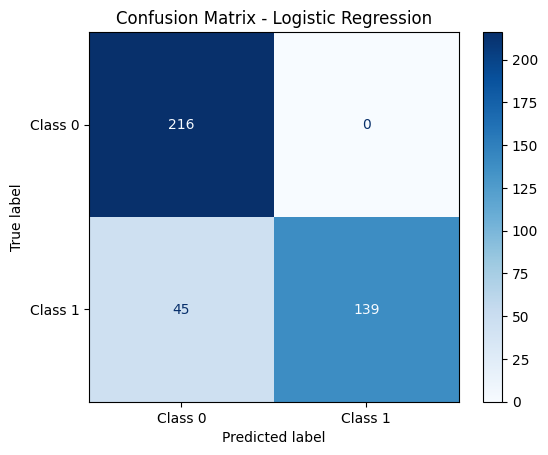

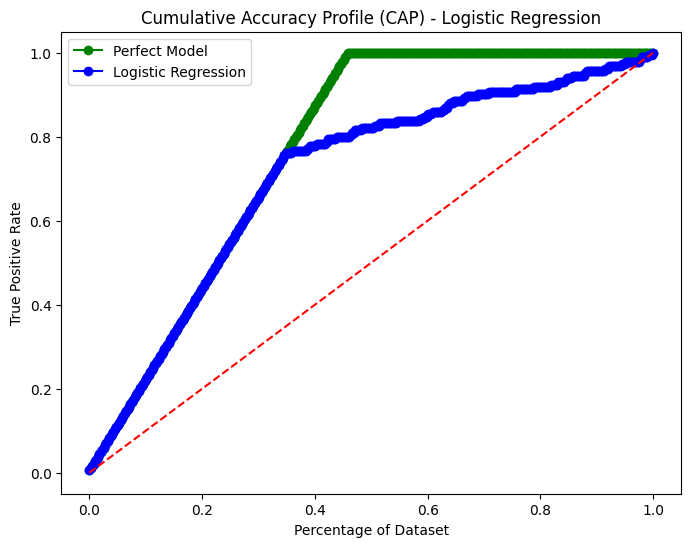

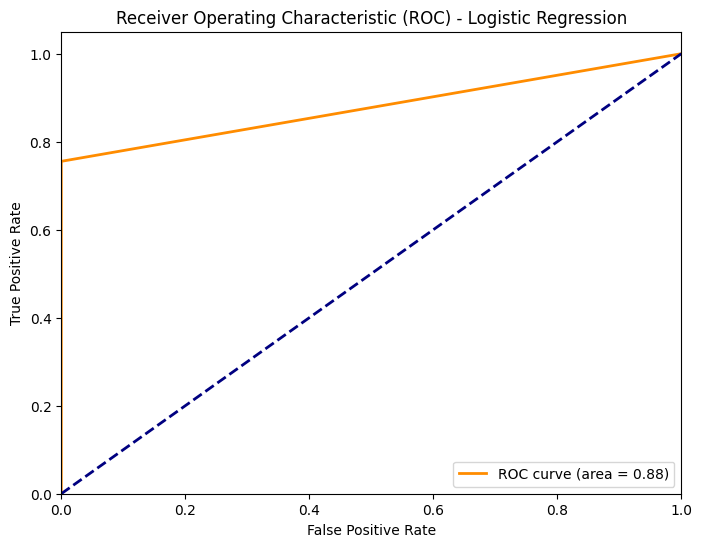

Accuracy: 86.31
Std-dev in Accuracy: 2.46
Precision: 1.00
Recall: 0.76
F1 Score: 0.86
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Training and evaluating Random Forest...
tn=204, fp=12, fn=10, tp=174


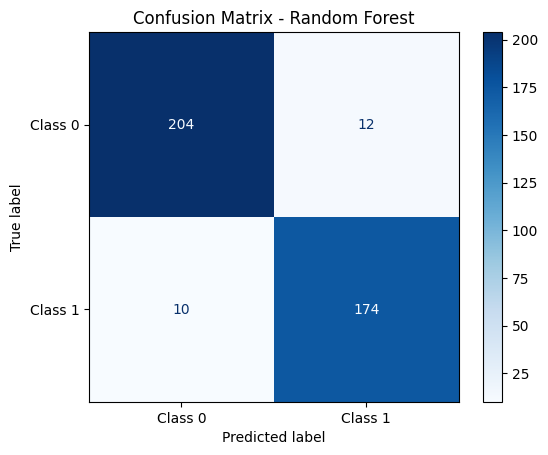

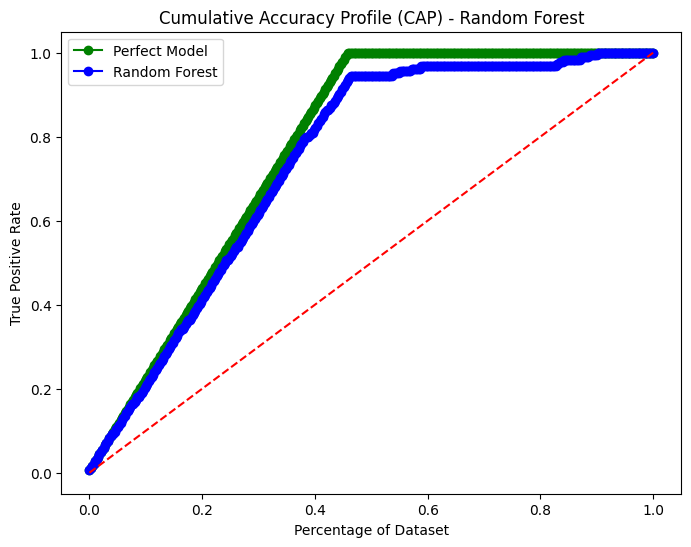

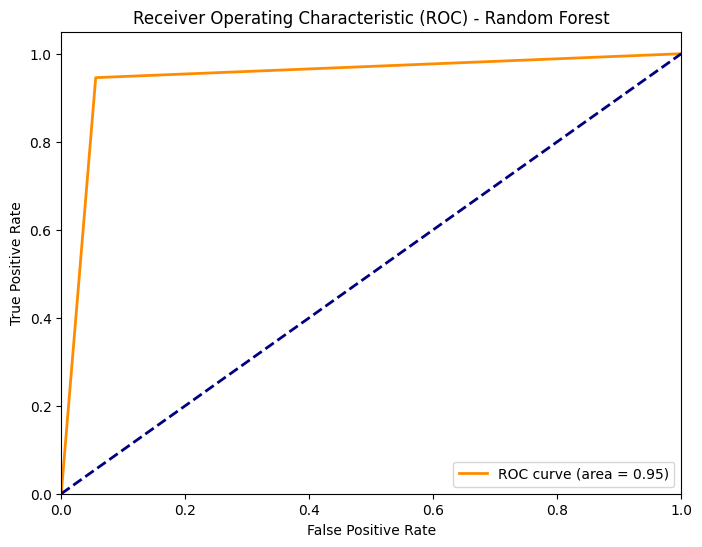

Accuracy: 93.56
Std-dev in Accuracy: 1.01
Precision: 0.94
Recall: 0.95
F1 Score: 0.94
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Training and evaluating Gradient Boosting...
tn=205, fp=11, fn=11, tp=173


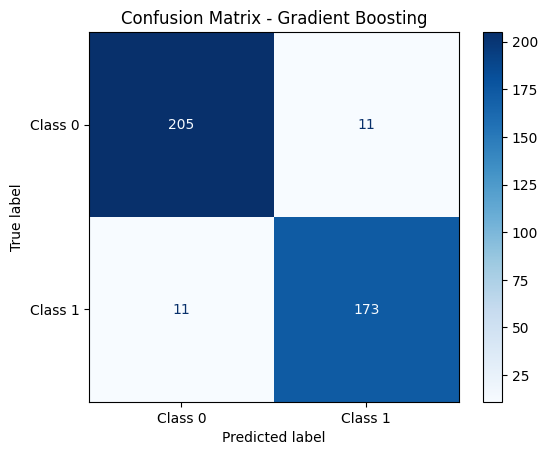

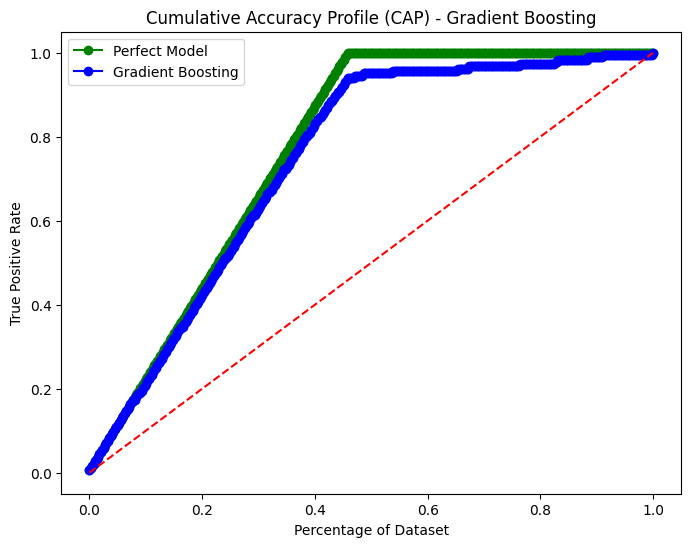

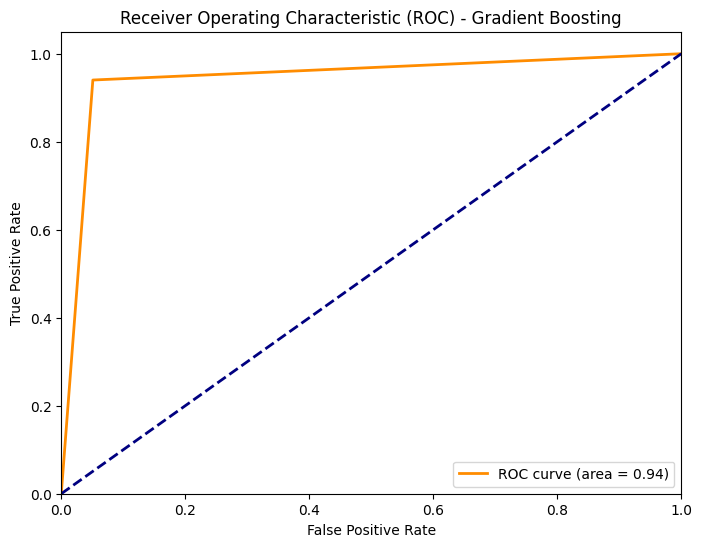

Accuracy: 93.38
Std-dev in Accuracy: 1.48
Precision: 0.94
Recall: 0.94
F1 Score: 0.94
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Training and evaluating SVM (RBF Kernel)...
tn=213, fp=3, fn=35, tp=149


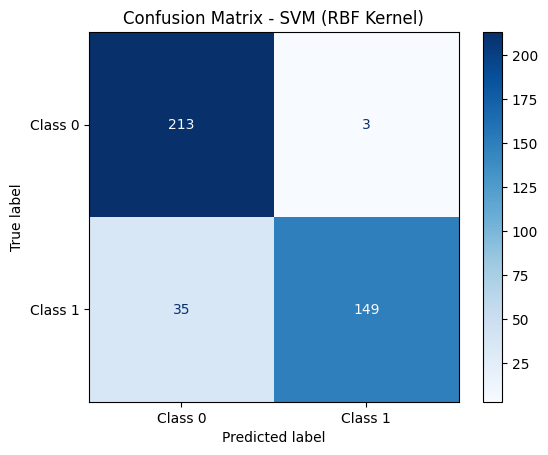

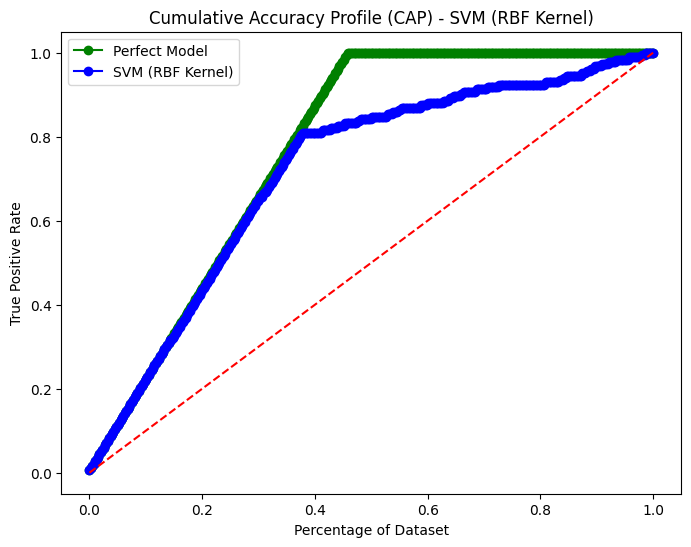

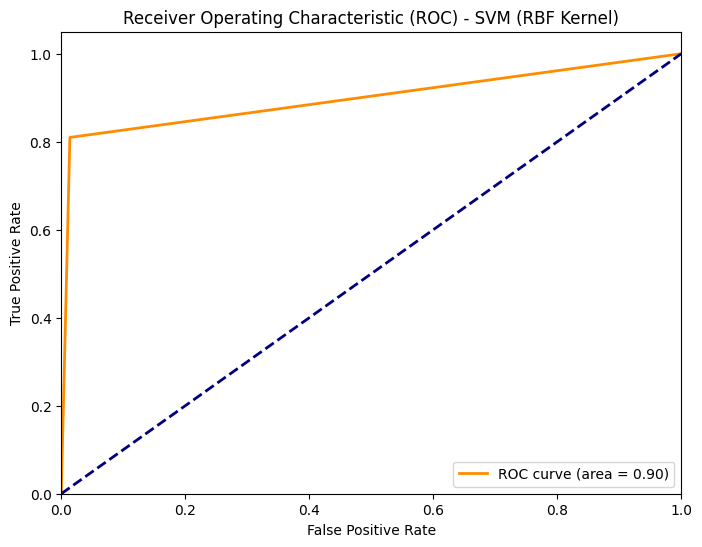

Accuracy: 89.19
Std-dev in Accuracy: 1.88
Precision: 0.98
Recall: 0.81
F1 Score: 0.89
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Training and evaluating XGBoost...
tn=203, fp=13, fn=9, tp=175


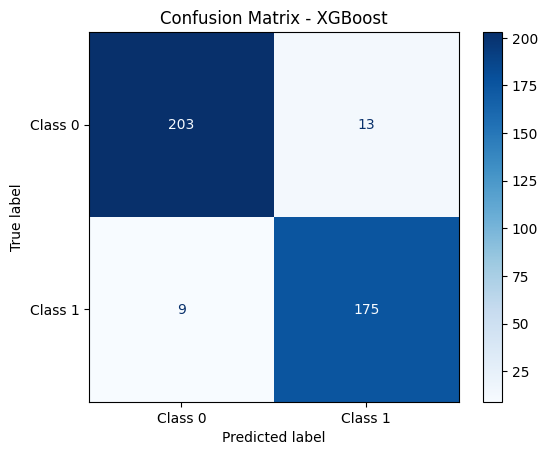

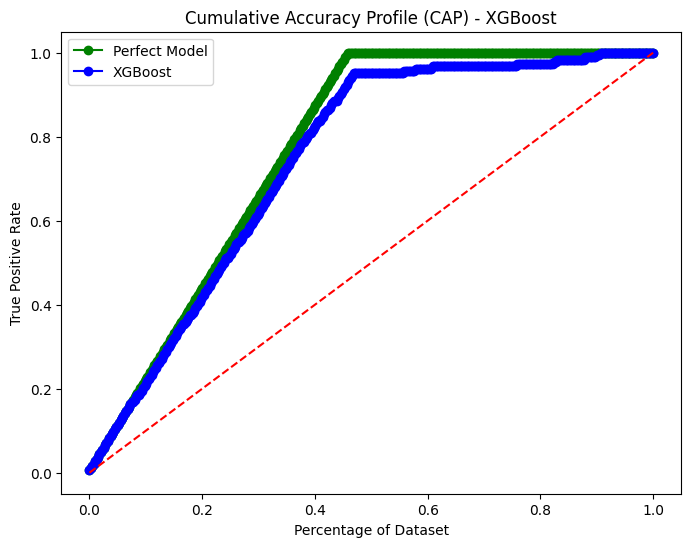

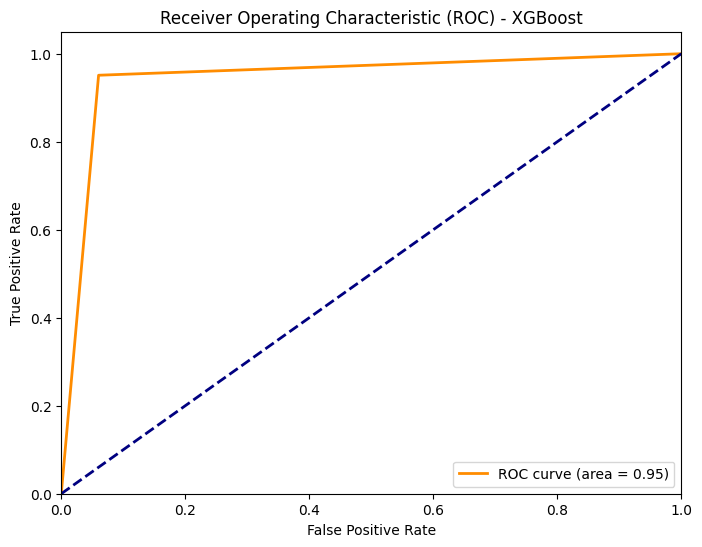

Accuracy: 92.56
Std-dev in Accuracy: 1.52
Precision: 0.93
Recall: 0.95
F1 Score: 0.94
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



In [35]:
# Performing k-fold cross-validation for Accuracy, confusion matrix plot, CAP plot, ROC plot, AUC, Precision, Recall and f1 score !!

# Calculate cumulative accuracy for the perfect model
sorted_indices = np.argsort(-y_test)
cum_acc = np.cumsum(y_test[sorted_indices]) / np.sum(y_test)
perfect_cum_acc = cum_acc
    
for name, pipeline in pipelines.items():
    print(f"Training and evaluating {name}...")
    
    # K-fold cross-validation
    accuracies = cross_val_score(pipeline, X_train, y_train, cv=10)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
    tn, fp, fn, tp = cm.ravel()
    print(f'tn={tn}, fp={fp}, fn={fn}, tp={tp}')
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # Calculate true positive rate (sensitivity) and cumulative accuracy
    sorted_indices = np.argsort(-y_pred)
    cum_acc = np.cumsum(y_test[sorted_indices]) / np.sum(y_test)
    pipeline_cum_acc = cum_acc

    
    # Plot CAP curve
    plt.figure(figsize=(8, 6))
    plt.plot(np.linspace(0, 1, len(perfect_cum_acc)), perfect_cum_acc, marker='o', linestyle='-', color='g', label='Perfect Model')
    plt.plot(np.linspace(0, 1, len(pipeline_cum_acc)), pipeline_cum_acc, marker='o', linestyle='-', color='b', label=name)
    plt.plot([0, 1], [0, 1], linestyle='--', color='r')
    plt.title(f'Cumulative Accuracy Profile (CAP) - {name}')
    plt.xlabel('Percentage of Dataset')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # ROC plot
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) - {name}')
    plt.legend(loc='lower right')
    plt.show()

    # Calculate and display precision and recall scores
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'Accuracy: {accuracies.mean()*100:.2f}')
    print(f'Std-dev in Accuracy: {accuracies.std()*100:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')

    print("---" * 94, end='\n\n')

## Observation(s):

* __Logistic Regression:__ This model achieves a good accuracy of 86.31%. It has high precision (1.00), indicating that when it predicts a positive outcome, it is often correct. However, its recall (0.76) is relatively lower, indicating that it may miss some true positive cases. The F1 Score (0.86) suggests a balanced trade-off between precision and recall. The ROC Curve area (0.88) is indicative of its ability to distinguish between classes.

* __Random Forest:__ The Random Forest model exhibits excellent performance with an accuracy of 93.25%. It demonstrates consistent precision (0.93) and recall (0.95) values, resulting in a high F1 Score (0.94). The ROC Curve area (0.95) underscores its robust discrimination capability.

* __Gradient Boosting:__ Similar to Random Forest, the Gradient Boosting model achieves high accuracy (93.31%). It maintains strong precision (0.94) and recall (0.94) values, resulting in a high F1 Score (0.94). The ROC Curve area (0.94) highlights its effective class separation.

* __SVM (RBF Kernel):__ The SVM model achieves an accuracy of 89.19%. It has a relatively high precision (0.98), indicating accurate positive predictions, but a lower recall (0.81), implying potential missed positive cases. The F1 Score (0.89) suggests a balanced trade-off between precision and recall. The ROC Curve area (0.90) demonstrates satisfactory performance in distinguishing classes.

* __XGBoost:__ The XGBoost model also demonstrates strong performance with an accuracy of 92.56%. It maintains consistent precision (0.93) and recall (0.95) values, resulting in a high F1 Score (0.94). The ROC Curve area (0.95) underscores its effective class separation.

__In summary, Random Forest, Gradient Boosting, and XGBoost consistently exhibit high accuracy, precision, recall, F1 Score, and ROC Curve area, indicating their robustness in classifying the target variable. Logistic Regression and SVM with RBF Kernel also demonstrate good performance, with varying strengths in precision-recall trade-offs. These observations suggest that ensemble methods (Random Forest, Gradient Boosting, and XGBoost) are particularly effective for this classification task.__

__Compared to the previous results where we used only two features ('Level_of_Hemoglobin' and 'Genetic_Pedigree_Coefficient'), the inclusion of additional features has led to substantial improvements in accuracy, F1 Score, and ROC Curve area for all models. This indicates that the new features have provided valuable information and context for the classification task, resulting in better model performance. The ensemble methods (Random Forest, Gradient Boosting, and XGBoost) particularly benefit from the additional features, demonstrating higher accuracy and better discrimination between classes.__

## END Note:

* In the context of clinical data classification, both precision and recall are important metrics, but their significance can vary based on the specific goals and requirements of the problem.

#### Precision and Recall are defined as follows:

* __Precision:__ It measures the proportion of correctly predicted positive instances (true positives) out of all instances predicted as positive (true positives + false positives). In clinical settings, precision is important when the cost of false positives (incorrectly identifying a patient as having an abnormality when they do not) is high. High precision means that when the model predicts a positive result (abnormality), it is likely to be correct. It helps in reducing unnecessary interventions or treatments for patients who do not actually have the condition.

* __Recall (Sensitivity):__ It measures the proportion of correctly predicted positive instances (true positives) out of all actual positive instances (true positives + false negatives). In clinical settings, recall is important when the cost of false negatives (failing to identify a patient with an actual abnormality) is high. High recall means that the model is good at identifying all instances of the condition, reducing the risk of missing potentially critical cases.

#### In summary:

* If the cost of false positives is high (e.g., unnecessary treatments, interventions, or further testing), focus on increasing precision while keeping recall reasonably high.
* If the cost of false negatives is high (e.g., missing critical conditions), focus on increasing recall while maintaining an acceptable level of precision.

It's important to strike a balance between precision and recall based on the specific clinical scenario and the potential consequences of false positives and false negatives. In many cases, we might aim for a good balance between precision and recall to ensure a clinically relevant and effective model.

# Thank You !!